# **Theory Session 03**

> **Teacher in charge:** ***Fabio Scielzo Ortiz***

**Email:** Fabio.scielzoortiz@gmail.com

**Web:** [Fabioscielzoortiz.com](https://fabioscielzoortiz.com/)

In [2]:
from PIL import Image

## **Classification Problems**

A **supervised classification problem** is a statistical problem that consists of predicting a **categorical** response variable using **information** from some **predictor variables** and the **response variable itself**.

An example of supervised classification is the classification of a song into a category of three musical styles, taking into account a series of features of the song.

- We have $p$ predictors $(\mathcal{X}_1 ,...,\mathcal{X}_p)$ and a **categorical** response variable $\mathcal{Y}$ with $c$ categories.

- We have a **sample** of size $n$ of the $p$ **predictors** and the **response**.

$$X=[X_1,\dots,X_p] = \begin{pmatrix}
    x_{11}&x_{12}&...&x_{1p} \\
    x_{21}&x_{22}&...&x_{2p} \\
    ... &...& ...&...\\
    x_{n1}&x_{n2}&...&x_{np}
    \end{pmatrix} = \begin{pmatrix}
    x_{1} \\
    x_{2} \\
     ... \\
     x_{n} 
    \end{pmatrix}\\[1cm]$$

$$Y=\begin{pmatrix}
    y_1 \\
    y_2 \\
    ...\\
    y_n
    \end{pmatrix}\\[0.5cm]$$
    


- The statistical solution to the classification problem involves proposing a model or algorithm that is capable of using the available sample information $D$ of the predictors and the response to predict the response value ​​ for each considered vector of observations of the predictors.

### **Types of classification problems**

- If $c=2$ $\Rightarrow$ Binary classification problem.

    - Example: classify a given patient as a diabetic patient or not based on medical information.

- If $c \geq 3$ $\Rightarrow$ Multi-class classification problem.

    -  Example: classify a song as pop, rock or reggaeton style based on other information about it.

- If $y_i$ is a list of categories $\Rightarrow$ Multi-label classification problem.

   - Example: classify a text into several categories / tags.

## **Classification Algorithms**

### **K-Nearest Neighbors (KNN)**


The $k$-nearest neighbors as classification algorithm has the following steps:

- A distance $\delta$ between observations of $\mathbf{X}$ is defined.

- Given a new observation $\mathbf{x}_{*}=(x_{*1},\dots , x_{*p})$ of the predictors $\mathbf{X}$, the $\delta$ distance between this new observation and those of $\mathbf{X}$ is computed, that is, $\delta(\mathbf{x}_{*}, \mathbf{x}_{i})$ is calculated for $i=1,\dots,n$.

- The $k$ nearest observation to $\mathbf{x}_{*}$, according to $\delta$ distance, are selected. 
  The set of them is denoted by $K(\mathbf{x}_{*})_\delta$ and is the set of the $k$-nearest neighbours of $\mathbf{x}_{*}$ according to $\delta$.

- **Prediction:** the prediction  of the response for a given value $\mathbf{x}_*\in\mathbb{R}^p$ of the predictors is the mode of the response  for the $k$-nearest neighbors, that is, as the most frequent category among the nearest neighbors:
 
    $$\widehat{y}_{*}  \hspace{0.05cm} = \hspace{0.05cm} \mathcal{Mo}\left(Y_{K(\mathbf{x}_{*})_\delta}\right)$$

    where: 

    - $Y_{K(\mathbf{x}_{*})_\delta}$ is a vector with the values of the response for the $k$-nearest neighbors of $x_{*}$ according to $\delta$ distance.

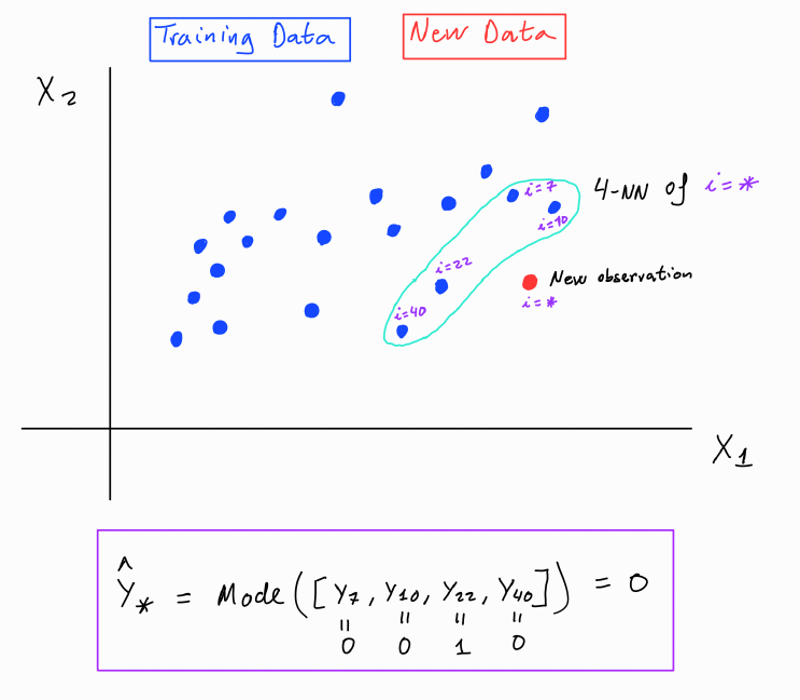

In [3]:
Image.open('images/knn.png').resize((800, 700)).convert("RGB")

#### **Hyper-parameters**


- $\delta$ = `metric`

- $k$ = `n_neighbors`

It is highly recommended to have a look at the `sklearn` implementation of this model, to see in detail how these (an other) parameters work:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

#### **Additional comments**

- If $k=n$ $\hspace{0.1cm}\Rightarrow\hspace{0.1cm}$ $\widehat{y}_* = \mathcal{Mo}(Y)$

- $k$ is usually the most important hyperparameter.

- If the number of classes is 2, is better to use odd (impar) $k$ to avoid draws (empates).

- The larger $k$, the simpler model $\hspace{0.1cm}\Rightarrow\hspace{0.1cm}$ less overfitting

- The smaller $k$, the more complex model $\hspace{0.1cm}\Rightarrow\hspace{0.1cm}$ more overfitting

- **Main disadvantages:** slow for large $p$, sensitive to noise, irrelevant predictors, depends on the metric...

---
---

### **Logistic Regression**

- We have a **binary**  response variable $\mathcal{Y}$ with domain $\lbrace 0, 1\rbrace$, and a $p$ predictors $\mathcal{X}_1,\dots,\mathcal{X}_p$ .

- We have data  for the response and the predictors: $Y\in \mathbb{R}^n , \hspace{0.1cm} X\in \mathbb{R}^{n\times p}$.

- We are interestinfg in predict the probabilities of the response for specific individuals, based on their data of the predictors:

   $$P_r(x_i)=P(\mathcal{Y}=r | \mathcal{X}=x_i)\hspace{0.05cm},\quad i=1,\dots,n$$
   
   Where: $x_i\in \mathbb{R}^p$ is the $i$-th row of $X$ and $r=0,1$

#### **How to define $P_r(x_i)$ ?**

There are two classic approaches, the naive one, based on Linear Regression and the one adopted in Logistic Regression.

##### **Naive approach: Linear Regression**

Apply Linear Regression on $Y$ as response variable and $X$ as predictors matrix, and use the prediction of $y_i$ as estimation of $P_1(x_i)$, that is, $\widehat{P}_1(x_i) = \widehat{y}_i$.

Under this approach:

$$P_1(x_i) = \beta_0 + x_i^\prime \cdot \beta$$

$$P_0(x_i) = 1 - P_1(x_i)$$

Where $\beta = (\beta_1,\dots , \beta_p)^\prime \in \mathbb{R}^p$.

We can estimate $\beta_0, \beta$ by Ordinary Least Squares, as usually in Linear Regression, using $Y$ as response variable and $X$ as predictors matrix. Then we obtain the estimations $\widehat{\beta}_0, \widehat{\beta}$, and using them que can estimate the above probabilities:

$$\widehat{P}_1(x_i) = \widehat{y}_i = \widehat{\beta}_0 + x_i^\prime \cdot \widehat{\beta}$$

$$\widehat{P}_0(x_i) = 1 - \widehat{P}_1(x_i)$$

**Problem of this approach:**

There is no guarantee of $\widehat{P}_r(x_i) \in [0,1]$ and since they are estimations of probabilities, this is not reasonable at all.

**Solution:** Logistic Regression.

##### **Logistic Regression approach**

In this approach:

$$P_1(x_i) =  \dfrac{e^{\beta_0 + x_i^\prime \cdot \beta}}{1+e^{\beta_0 + x_i^\prime \cdot \beta}}$$

$$P_0(x_i) =1-P_1(x_i) = \dfrac{1}{1+e^{\beta_0 + x_i^\prime \cdot \beta}}$$

Where:

$$f(x)=\dfrac{e^x}{1+e^x} \in [0,1], \hspace{0.1cm}\forall x\in \mathbb{R}$$

is the **logistic function**.

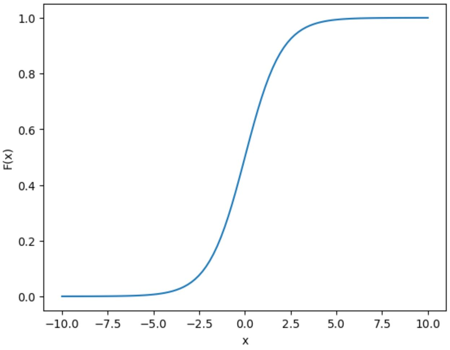

In [12]:
Image.open('images/logistic.jpg').resize((450, 350))

Once the model is estimated (i.e. the coefficients) we have the following estimations:

$$\widehat{P}_1(x_i) =  \dfrac{e^{\widehat{\beta}_0 + x_i^\prime \cdot \widehat{\beta}}}{1+e^{\widehat{\beta}_0 + x_i^\prime \cdot \widehat{\beta}}}$$

$$\widehat{P}_0(x_i) =1-\widehat{P}_1(x_i) = \dfrac{1}{1+e^{\widehat{\beta}_0 + x_i^\prime \cdot \widehat{\beta}}}$$

#### **Model estimation**

The **Maximum Likelihood Method** is used.

**Main principle:** select the beta coefficients that maximize the likelihood of our response sample, that is, the probability of obtaining our response sample given the predictors data under the probabilistic assumptions of the model.




Consider a s.r.s. $\mathcal{Y}_1,\dots,\mathcal{Y}_n$ of $\mathcal{Y}$.

Since $\mathcal{Y} | \mathcal{X}=x_i \sim Ber(P_1(x_i))$, then, because of they are identically distributed to $\mathcal{Y}$, is fulfilled:

$$\mathcal{Y}_i| \mathcal{X}=x_i \sim Ber(P_1(x_i))\hspace{0.05cm}, \quad \forall i=1,\dots,n$$

The density function of $\mathcal{Y}_i| \mathcal{X}=x_i$ is:

$$f_{\mathcal{Y}_i| \mathcal{X}=x_i }(y) = P_1(x_i)^{y} \cdot P_0(x_i)^{1-y}$$

Where $y=0,1$.

The Likelihood function of the simple random sample (s.r.s.) is:

$$\mathcal{L}(\beta_0,\beta) = f_{\mathcal{Y}_1| \mathcal{X}=x_1,...,\mathcal{Y}_n| \mathcal{X}=x_n}(y_1,\dots, y_n) = \prod_{i=1}^n f_{\mathcal{Y}_i| \mathcal{X}=x_i }(y_i) = \prod_{i=1}^n  P_1(x_i; \beta_0,\beta)^{y_i} \cdot P_0(x_i; \beta_0,\beta)^{1-y_i}$$

The log Likelihood is given by:

$$log(\mathcal{L}(\beta_0, \beta)) = log\left( \prod_{i=1}^n  P_1(x_i; \beta_0,\beta)^{y_i} \cdot P_0(x_i; \beta_0,\beta)^{1-y_i} \right) = \sum_{i=1}^n log\left(P_1(x_i; \beta_0,\beta)^{y_i} \cdot P_0(x_i; \beta_0,\beta)^{1-y_i}\right) = \\[0.5cm]
= \hspace{0.1cm} \sum_{i=1}^n \hspace{0.05cm} y_i\cdot log\big(P_1(x_i; \beta_0,\beta)\big) \hspace{0.1cm} + \hspace{0.1cm} \sum_{i=1}^n \hspace{0.05cm} (1-y_i)\cdot log\big(1- P_1(x_i; \beta_0,\beta)\big)

The estimation of $\beta_0 , \beta$ is given by:

$$\widehat{\beta}_0 , \widehat{\beta} \hspace{0.1cm} =\hspace{0.1cm} arg \hspace{0.1cm} \underset{\beta_0, \beta}{Max} \hspace{0.1cm} \mathcal{L}(\beta_0,\beta) \hspace{0.1cm} = \hspace{0.1cm} arg \hspace{0.1cm} \underset{\beta_0, \beta}{Max} \hspace{0.1cm} log(\mathcal{L}(\beta_0, \beta)) \\[0.4cm]
\hspace{0.1cm} = \hspace{0.1cm} arg \hspace{0.1cm} \underset{\beta_0, \beta}{Max} \hspace{0.1cm} \Big[\sum_{i=1}^n \hspace{0.05cm} y_i\cdot log\big(P_1(x_i; \beta_0,\beta)\big) \hspace{0.1cm} + \hspace{0.1cm} \sum_{i=1}^n \hspace{0.05cm} (1-y_i)\cdot log\big( 1-P_1(x_i; \beta_0,\beta)\big) \Big] \\[0.4cm]
\hspace{0.1cm} = \hspace{0.1cm} arg \hspace{0.1cm} \underset{\beta_0, \beta}{Max} \hspace{0.1cm} \Big[\sum_{i=1}^n \hspace{0.05cm} y_i\cdot log\left(\dfrac{e^{\beta_0 + x_i^\prime \cdot \beta}}{1+e^{\beta_0 + x_i^\prime \cdot \beta}}\right) \hspace{0.1cm} + \hspace{0.1cm} \sum_{i=1}^n \hspace{0.05cm} (1-y_i)\cdot log\left(\dfrac{1}{1+e^{\beta_0 + x_i^\prime \cdot \beta}}\right)  \Big]$$

#### **Model predictions**

We have two options: 

1. Predict $P_r(x_i)$ $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ **Regression problem (probabilistic classification)** 

2. Predict $\mathcal{Y}$  $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ **Classification problem** 



##### **Predicting** $P_r(x_i)$ 

Once we have the estimations of the beta coefficients, the prediction of the probabilities of the response is immediate.


Given $x_i \in \mathbb{R}^p$,

$$\widehat{P}_1(x_i) = \dfrac{e^{\widehat{\beta}_0 + x_i^\prime \cdot \widehat{\beta}}}{1+e^{\widehat{\beta}_0 + x_i^\prime \cdot \widehat{\beta}}}$$

$$\widehat{P}_0(x_i) = 1 - \widehat{P}_1(x_i) = \dfrac{1}{1+e^{\widehat{\beta}_0 + x_i^\prime \cdot \widehat{\beta}}}$$


##### **Predicting** $\mathcal{Y}$ 



Using the estimation of the probabilities (as above) we can predict the class of a given individual as the most probable one for him.

The prediction of the response for a given value $x_* \in \mathbb{R}^p$ of the predictors is,

$$\widehat{y}_* \hspace{0.1cm}=\hspace{0.1cm} arg \hspace{0.1cm}\underset{r=0,1}{Max} \hspace{0.1cm}\widehat{P}_r(x_*)$$

In other words, $\widehat{y}_*$ is the category with higher predicted probability for $x_*$.

#### **Odds Ratio**

$$OR(x_i) = \dfrac{\widehat{P}_1(x_i)}{\widehat{P}_0(x_i)} = e^{\widehat{\beta}_0 + x_i^\prime \cdot \widehat{\beta}} = e ^{\widehat{\eta}_i }$$

Where $\small{\widehat{\eta}_i = \widehat{\beta}_0 + x_i^\prime \cdot \widehat{\beta}}$ is notation. 

**Interpretation:**

1) $OR(x_i)$ can be interpreted as the possibility of $y_i=1$ with respect to $y_i=0$

2) Big $OR(x_i)$ means that $\widehat{P}_1(x_i) >> \widehat{P}_0(x_i)$

3) Small $OR(x_i)$ means that $\widehat{P}_1(x_i) << \widehat{P}_0(x_i)$

4) Log Odds Ratio

   $$log(OR(x_i)) = \widehat{\beta}_0 + x_i^\prime \cdot \widehat{\beta}$$

   This is like the linear regression formula but changing $y_i$ by $log(OR(x_i))$



#### **Coefficient Interpretation**

##### **Interpretation of quantitative predictors**

Suppose $\mathcal{X}_j$ is a quantitative.

We have the following estimation:

$$\widehat{\eta}_i = \widehat{\beta}_0 + \widehat{\beta}_{1}\cdot x_{i1} + \dots +  \widehat{\beta}_{j} \cdot x_{ij} + \dots +   \widehat{\beta}_{p}\cdot x_{ip} \quad (1)$$

- If $x_{ij}^\prime = x_{ij} + h$, with $h>0$ ($x_{ij}$ increases in $h$ units), then:

    $$\dfrac{OR(x_{i} | x_{ij}^\prime)}{OR(x_{i} | x_{ij})} =  \dfrac{e^{\widehat{\eta}_i |x'_{ij}} }{e^{\widehat{\eta}_i |x_{ij}}} = e^{\widehat{\eta}_i |x'_{ij} - \widehat{\eta}_i |x_{ij}} = e^{h\cdot \widehat{\beta}_j}$$

    - If $ \widehat{\beta}_j > 0$, then, $e^{h\cdot \widehat{\beta}_j} > 1$, so, then:

        - $OR(x_{i} | x_{ij}^\prime)$  is $e^{h\cdot \widehat{\beta}_j}$ times greater than $OR(x_{i} | x_{ij})$ 

        - This means that the possibility of $y_i = 1$ with respect to $y_i=0$ is $e^{h\cdot \widehat{\beta}_j}$ times greater when $x_{ij}$ increases in $h>0$ units.

        - So, in general, if $ \widehat{\beta}_j > 0$, then, if $X_j$ increases in $h>0$ units, the possibility of  $Y=1$ with respect to $Y=0$ is $e^{h\cdot \widehat{\beta}_j}$ times **greater**.

    - If $ \widehat{\beta}_j < 0$, then, $e^{h\cdot \widehat{\beta}_j} < 1$, so, then:

        - $OR(x_{i} | x_{ij})$  is $1/e^{h\cdot \widehat{\beta}_j}$ times greater than $OR(x_{i} | x_{ij}^\prime)$ 

        - This means that the possibility of $y_i = 1$ with respect to $y_i=0$ is $1/e^{h\cdot \widehat{\beta}_j}$ times lower  when $x_{ij}$ increases in $h>0$ units.

        - So, in general, if $ \widehat{\beta}_j < 0$, then, if $X_j$ increases in $h>0$ units, then the possibility of $Y=1$ with respect to $Y=0$ is $1/e^{h\cdot \widehat{\beta}_j}$ times **lower**.

Explaining $(1)$ in more details:

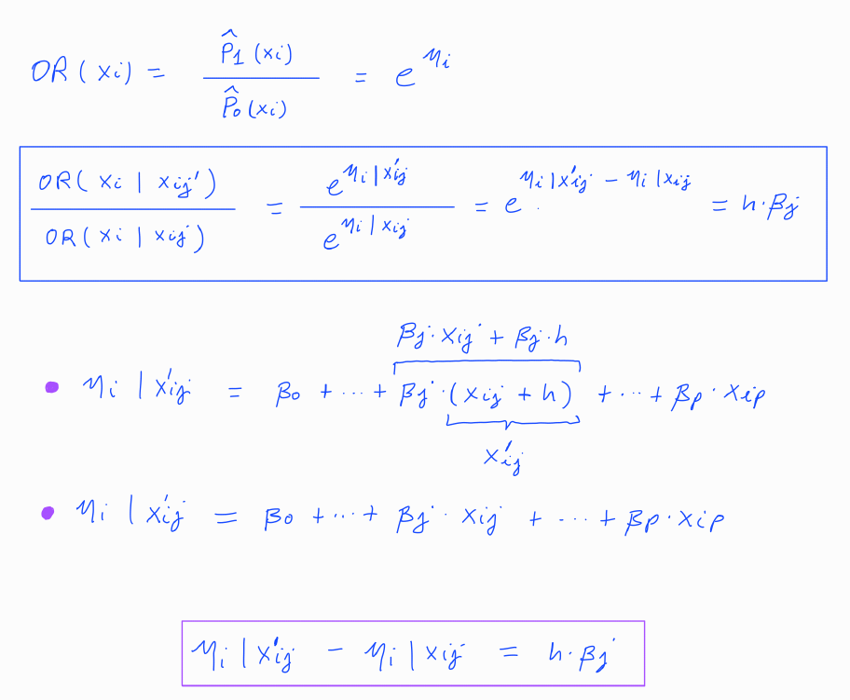

In [3]:
Image.open('images/p1.png').resize((850, 700)).convert("RGB")

##### **Interpretation of categorical predictors**



Suppose that $\mathcal{X}_j$ is a **categorical** variable with $g$ categories $(Range(\mathcal{X}_j) = \lbrace 0,1,\dots, g-1\rbrace)$. 

$\mathcal{X}_j$ enter in the model with $g-1$ dummy predictors. Considering $0$ as the reference category, these dummy predictors that enter in the model to represent $\mathcal{X}_j$ are the following:

$$X_{j1},X_{j2},\dots , X_{j(g-1)}$$

with their associated beta parameters:

$$\beta_{j1}, \beta_{j2}, \dots , \beta_{j(g-1)}$$

Where: 

$$x_{ijr} = \begin{cases}
             1, \quad x_{ij} = r \\
             0, \quad x_{ij} \neq r
             \end{cases}$$

Note that $x_{ijr} = 1$ is equivalent to $x_{ij} = r$, and $x_{ij}=0$ is equivalent to $x_{ijr}=0$ for all $\small{r=1,2, \dots, g-1}$.

The estimation  would be:


$$\widehat{\eta}_i = \widehat{\beta}_0 + \widehat{\beta}_{1}\cdot x_{i1} +  \dots +  \widehat{\beta}_{j1} \cdot x_{i j1} + \widehat{\beta}_{j2} \cdot x_{i j2} + \dots + \widehat{\beta}_{j(g-1)} \cdot x_{i j(g-1)} + \dots +   \widehat{\beta}_{p}\cdot x_{ip}$$

- Comparison between category $r$ and $0$ (the reference category):


   $$\dfrac{OR(x_{i} | x_{ijr} = 1)}{OR(x_{i} | x_{ij} = 0)} = \dfrac{e^{\widehat{\eta}_i |x_{ijr} = 1} }{e^{\widehat{\eta}_i |x_{ij}=0}} = e^{\widehat{\eta}_i |x_{ijr} = 1 - \widehat{\eta}_i |x_{ij}=0} = e^{\widehat{\beta}_{jr}}\quad (2)$$

    - If $ \widehat{\beta}_{jr} > 0$, then, $e^{\widehat{\beta}_{jr}} > 1$, so, then:

        - $OR(x_{i} | x_{ij}=r)$  is $e^{\widehat{\beta}_{jr}}$ times greater than $OR(x_{i} | x_{ij}=0)$ 

        - This means that the possibility of $y_i = 1$ with respect to $y_i=0$ is $e^{\widehat{\beta}_{jr}}$ times greater when $x_{ij}=r$ than when $x_{ij}=0$.

        - So, in general, if $ \widehat{\beta}_{jr} > 0$, then, if $X_j = r$, then the possibility of $Y=1$ with respect to $Y=0$ is $e^{\widehat{\beta}_{jr}}$ times **greater** than when $x_{ij}=0$.

    - If $ \widehat{\beta}_{jr} < 0$, then, $e^{\widehat{\beta}_{jr}} < 1$, so, then:

        - $OR(x_{i} | x_{ij}=0)$  is $1/e^{ \widehat{\beta}_{jr}}$ times greater than $OR(x_{i} | x_{ij}=r)$ 

        - This means that the possibility of  $y_i = 1$ with respect to $y_i=0$ is $1/e^{\widehat{\beta}_{jr}}$ times  lower when $x_{ij}=r$ than when $x_{ij}=0$.

        - So, in general, if $ \widehat{\beta}_{jr} > 0$, then, if $X_j = r$, then the possibility of $Y=1$ with respect to $Y=0$ is $1/e^{\widehat{\beta}_{jr}}$ times **lower** than when $X_j=0$.

Explaining $(2)$ with more details:

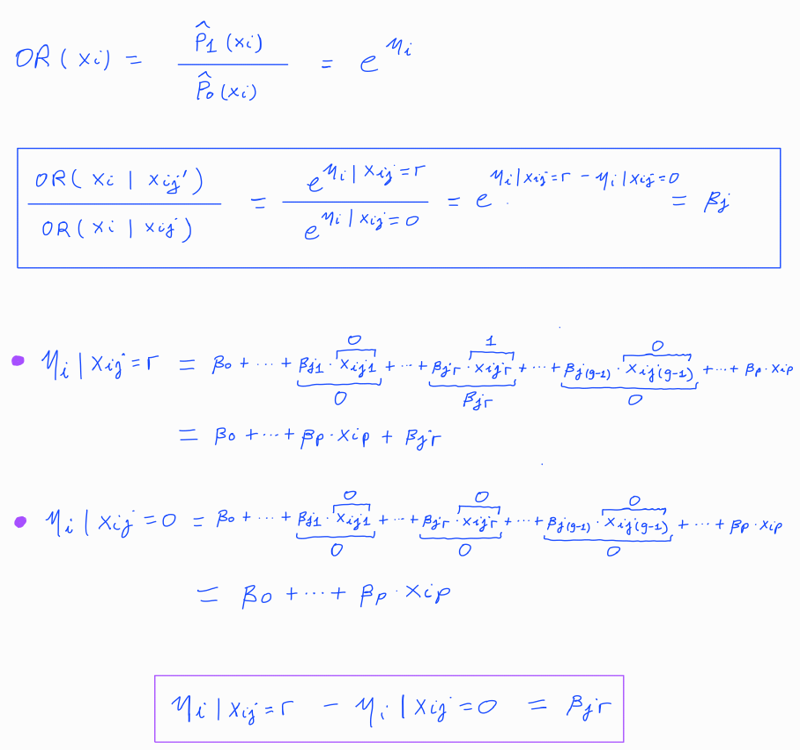

In [4]:
Image.open('images/p2.png').resize((800, 750)).convert("RGB")

- Comparison between category $r$ and $c$

    $$\dfrac{OR(x_{i} | x_{ijr} = 1)}{OR(x_{i} | x_{ijc} = 1)} = \dfrac{OR(x_{i} | x_{ij} = r)}{OR(x_{i} | x_{ij} = c)} = \dfrac{e^{\widehat{\eta}_i |x_{ijr} = 1} }{e^{\widehat{\eta}_i |x_{ijc}=1}} = e^{\widehat{\eta}_i |x_{ijr} = 1 - \widehat{\eta}_i |x_{ijc}=1} = e^{\widehat{\beta}_{jr} - \widehat{\beta}_{jc}}\quad (3)$$

    - If $ \widehat{\beta}_{jr} > \widehat{\beta}_{jc} $, then, $e^{\widehat{\beta}_{jr} - \widehat{\beta}_{jc}} > 1$, so, then:

        - $OR(x_{i} | x_{ij}=r)$  is $e^{\widehat{\beta}_{jr} - \widehat{\beta}_{jc}}$ times greater than $OR(x_{i} | x_{ij}=c)$ 

        - This means that the possibility of $y_i = 1$ with respect to $y_i=0$ is $e^{\widehat{\beta}_{jr} - \widehat{\beta}_{jc}}$ times **greater** when $x_{ij}=r$ than when $x_{ij}=c$.

        - So, in general, if $ \widehat{\beta}_{jr} > \widehat{\beta}_{jc}$, then, if $X_j = r$, then the possibility of $Y=1$ with respect to $Y=0$ is $e^{\widehat{\beta}_{jr} - \widehat{\beta}_{jc}}$ times **greater** than when $x_{ij}=c$.

    - If $ \widehat{\beta}_{jr} < \widehat{\beta}_{jc}$, then, $e^{\widehat{\beta}_{jr} - \widehat{\beta}_{jc}} < 1$, so, then:

        - $OR(x_{i} | x_{ij}=c)$  is $1/e^{ \widehat{\beta}_{jr}-\widehat{\beta}_{jc}}$ times greater than $OR(x_{i} | x_{ij}=r)$ 

        - $OR(x_{i} | x_{ij}=r)$  is $1/e^{ \widehat{\beta}_{jr}-\widehat{\beta}_{jc}}$ times lower than $OR(x_{i} | x_{ij}=c)$ 

        - This means that the possibility of  $y_i = 1$ with respect to $y_i=0$ is $1/e^{\widehat{\beta}_{jr} - \widehat{\beta}_{jc}}$ times  **lower** when $x_{ij}=r$ than when $x_{ij}=c$.

        - So, in general, if $\widehat{\beta}_{jr} < \widehat{\beta}_{jc}$, then, if $X_j = r$, then the possibility of $Y=1$ with respect to $Y=0$ is $1/e^{\widehat{\beta}_{jr} - \widehat{\beta}_{jc}}$ times **lower** than when $X_j=c$.

Explaining $(3)$ with more details:

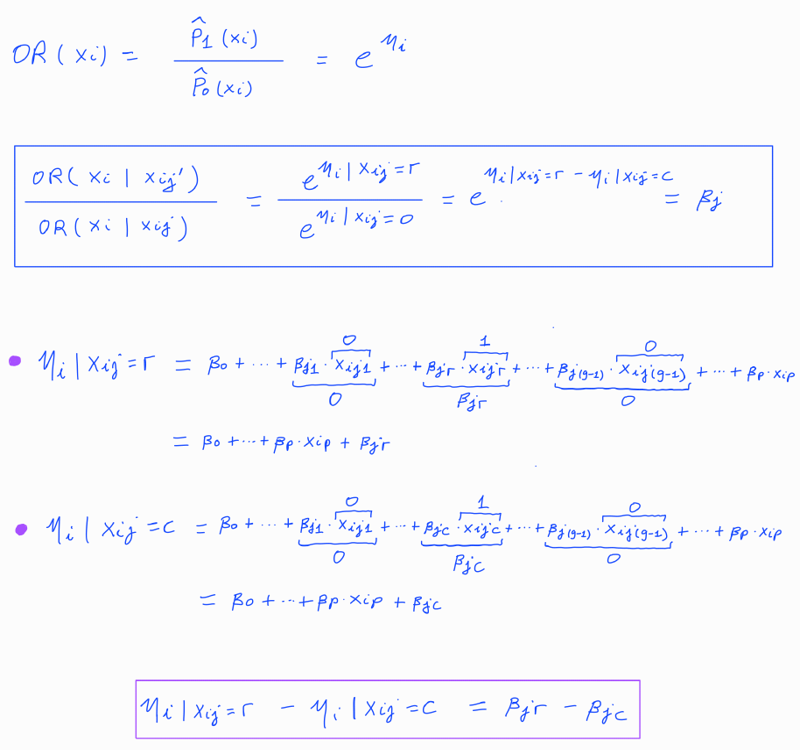

In [5]:
Image.open('images/p3.png').resize((800, 750)).convert("RGB")

##### **With interactions**

Suppose that $X_{j}$ is quantitative and $X_k$ is categorical with $g$ categories $\lbrace 0, 1, \dots, g-1\rbrace$ and the reference category is $0$.

And also suppose that the model includes an interaction between $X_j$ and $X_k$, then:

$$\widehat{\eta}_i = \widehat{\beta}_0 + \dots + \widehat{\beta}_j\cdot x_{ij} 
+ \widehat{\beta}_{k1} \cdot x_{i k1} + \dots + \widehat{\beta}_{k(g-1)} \cdot x_{i k(g-1)} + \\[0.15cm]

+ \widehat{\beta}_{jk1}\cdot x_{ij}\cdot x_{ik1} + \dots +   \widehat{\beta}_{jk(g-1)}\cdot x_{ij}\cdot x_{ik(g-1)}$$

Where:

- $\widehat{\beta}_{jk}$ is the coefficient fot he interaction between $X_j$ and $X_k$.

- $\widehat{\beta}_{jkr}$ is the coefficient fot the interaction between $X_j$ and $X_{kr}$ (the dummy variable associated to the category $r$ of $X_k$), for $\small{r=1,2,\dots,g-1}.$



**Quantitative predictors:**

- If $\mathcal{X}_j$ increases in $h>0$ units, in sample terms, the new value of the variable $X_j$ is $X_j + h$, and we can express this as $X'_j =X_j +h$, then:

    $$\dfrac{OR(x_{i} | x_{ij}^\prime)}{OR(x_{i} | x_{ij})} =  \dfrac{e^{\widehat{\eta}_i |x'_{ij}} }{e^{\widehat{\eta}_i |x_{ij}}} = e^{\widehat{\eta}_i |x'_{ij} - \widehat{\eta}_i |x_{ij}} = e^{\phi(\cdot) }\quad (4)$$

    Where:

    $$\phi(\cdot) = \phi\left(x_{ik1}, x_{ik2}, \dots, x_{ik(g-1)}\right) = h\cdot \widehat{\beta}_j + h\cdot x_{ik1} \cdot \widehat{\beta}_{jk1}+ \dots +  h\cdot x_{ik(g-1)} \cdot \widehat{\beta}_{jk(g-1)}$$


    **Interpretation:**

    Now the interpretation not only depend on the coefficient of the variable, but also on the coefficients and value of the categorical predictor with which an interaction has been set. 

    For individuals with $x_{ik} = r$, i.e. $x_{ikr}=1$, then $\phi(\cdot) = h\cdot (\widehat{\beta}_j + \widehat{\beta}_{jkr})$.

    - If $\widehat{\beta}_j + \widehat{\beta}_{jkr} > 0$ $\hspace{0.15cm} (e^{h (\widehat{\beta}_j + \widehat{\beta}_{jkr})} > 1)$, then:

       - The $OR(x_{i} | x_{ij}^\prime)$ is $e^{h \hspace{0.05cm} \cdot (\widehat{\beta}_j + \widehat{\beta}_{jkr})} $ times greater than $OR(x_{i} | x_{ij})$
    
        - The possibility of $y_i=1$ with respect to $y_i=0$ is $e^{h \hspace{0.05cm} \cdot (\widehat{\beta}_j + \widehat{\beta}_{jkr})} $ times greater if $x_{ij}$ increases in $h>0$ units .

    - If $\widehat{\beta}_j + \widehat{\beta}_{jhr} < 0$ $\hspace{0.15cm} (e^{w (\widehat{\beta}_j + \widehat{\beta}_{jhr})} < 1)$, is fulfilled that:

        - The $OR(x_{i} | x_{ij})$ is $1/e^{h \hspace{0.05cm} \cdot (\widehat{\beta}_j + \widehat{\beta}_{jkr})} $ times greater than $OR(x_{i} | x_{ij}^\prime)$
    
        - The possibility of $y_i=1$ with respect to $y_i=0$ is $1/e^{h \hspace{0.05cm} \cdot (\widehat{\beta}_j + \widehat{\beta}_{jkr})} $ times lower if $x_{ij}$ increases in $h>0$ units .

    Observation: the reasoning is analogous if the predictor decreases rather than increases, but in the opposite sense.

Explaining $(4)$ with more details:

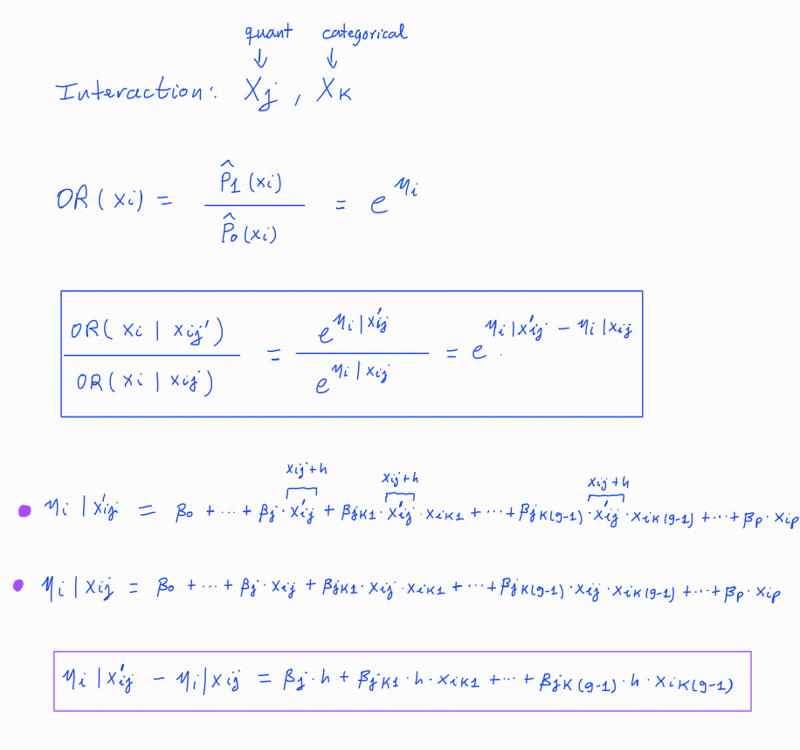

In [6]:
Image.open('images/p4.png').resize((800, 750)).convert("RGB")

**Categorical predictors:**

- Comparison between category $r$ and $0$ (the reference category) in $X_k$:

    $$\dfrac{OR(x_{i} | x_{ikr} = 1)}{OR(x_{i} | x_{ik} = 0)} = \dfrac{e^{\widehat{\eta}_i |x_{ikr} = 1} }{e^{\widehat{\eta}_i |x_{ik}=0}} = e^{\widehat{\eta}_i |x_{ikr} = 1 - \widehat{\eta}_i |x_{ik}=0} =  e^{\phi(\cdot)}\quad (5)$$

    Where:

    $$\phi(\cdot) = \phi(x_{ik}) = \widehat{\beta}_{kr} +  x_{ij} \cdot \widehat{\beta}_{jkr}$$

    **Interpretation:**

    Now the interpretation not only depend on the coefficient of the variable, but also on the coefficients and value of the quantitative predictor with which an interaction has been set $(x_{ij})$. 

    - If $\widehat{\beta}_{kr} +  x_{ij} \cdot \widehat{\beta}_{jkr} > 0$ $\hspace{0.15cm} (e^{\widehat{\beta}_{kr} +  x_{ij} \cdot \widehat{\beta}_{jkr}} > 1)$, is fulfilled that:

       -   $OR(x_{i} | x_{ik}=r)$  is $e^{\widehat{\beta}_{kr} +  x_{ij} \cdot \widehat{\beta}_{jkr}} $ times greater than $OR(x_{i} | x_{ik}=0)$ 
    
        -  This means that the possibility of $y_i = 1$ with respect to $y_i=0$ is $e^{\widehat{\beta}_{kr} +  x_{ij} \cdot \widehat{\beta}_{jkr}} $ times greater when $x_{ij}=r$ than when $x_{ij}=0$.

    - If $\widehat{\beta}_{hr} +  x_{ij} \cdot \widehat{\beta}_{jhr} < 0$ $\hspace{0.15cm} (e^{\widehat{\beta}_{hr} +  x_{ij} \cdot \widehat{\beta}_{jhr}} < 1)$, is fulfilled that:
    
       -   $OR(x_{i} | x_{ik}=0)$  is $1/e^{\widehat{\beta}_{kr} +  x_{ij} \cdot \widehat{\beta}_{jkr}} $ times greater than $OR(x_{i} | x_{ik}=r)$ 
    
        -  This means that the possibility of $y_i = 1$ with respect to $y_i=0$ is $1/e^{\widehat{\beta}_{kr} +  x_{ij} \cdot \widehat{\beta}_{jkr}} $ times lower when $x_{ij}=r$ than when $x_{ij}=0$.


Explaining $(5)$ with more details:

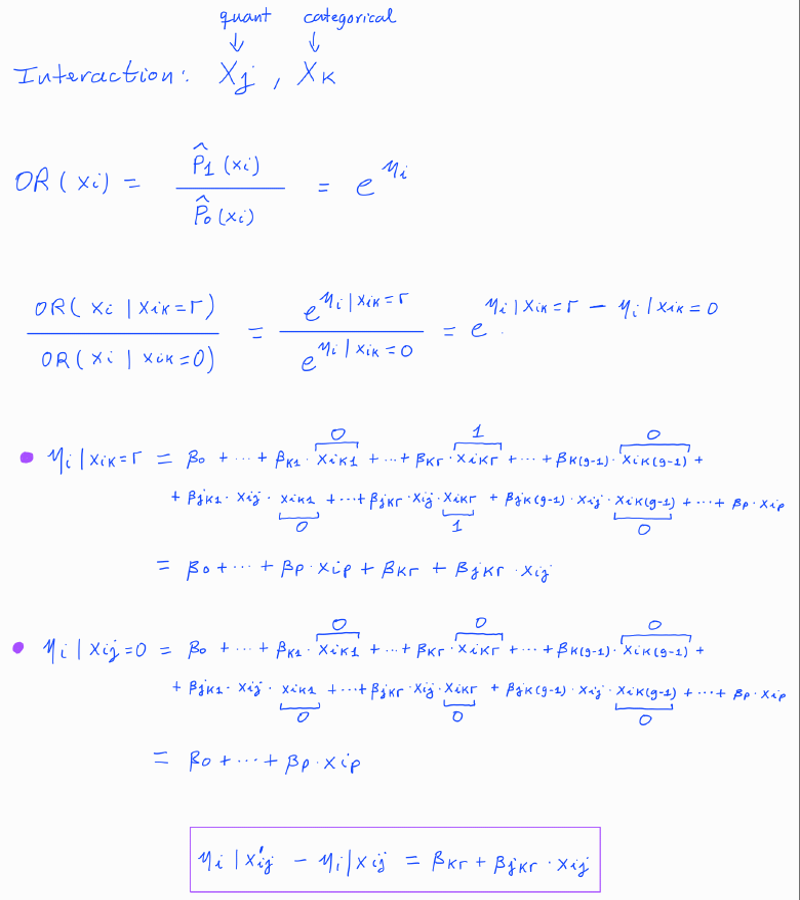

In [7]:
Image.open('images/p5.png').resize((800, 900)).convert("RGB")

- Comparison between category $r$ and $c$ (the reference category) in $X_h$:

    $$\dfrac{OR(x_{i} | x_{ikr} = 1)}{OR(x_{i} | x_{ikc} = 1)} = \dfrac{OR(x_{i} | x_{ik} = r)}{OR(x_{i} | x_{ik} = c)} =  \dfrac{e^{\widehat{\eta}_i | x_{ik} = r} }{e^{\widehat{\eta}_i |x_{ik}= c}} = e^{\widehat{\eta}_i |x_{ik}=r - \widehat{\eta}_i |x_{ih}=c} = e^{\phi(\cdot)}\quad (6)$$

    Where:

    $$\phi(\cdot) = \phi(x_{ij}) = (\widehat{\beta}_{kr}- \widehat{\beta}_{kr})+  x_{ij} \cdot (\widehat{\beta}_{jkr}-\widehat{\beta}_{jkc})$$

    **Interpretation:**

    Now the interpretation not only depend on the coefficient of the variable, but also on the coefficients and value of the quantitative predictor with which an interaction has been set. 

    - If $(\widehat{\beta}_{kr}- \widehat{\beta}_{kc})+  x_{ij} \cdot (\widehat{\beta}_{jkr}-\widehat{\beta}_{jkc}) > 0$ $\hspace{0.15cm} (e^{\phi(\cdot)} > 1)$, is fulfilled that:
    
       -   $OR(x_{i} | x_{ik}=r)$  is $e^{(\widehat{\beta}_{kr}- \widehat{\beta}_{kc})+  x_{ij} \cdot (\widehat{\beta}_{jkr}-\widehat{\beta}_{jkc})} $ times greater than $OR(x_{i} | x_{ik}=c)$ 
    
        -  This means that the possibility of $y_i = 1$ with respect to $y_i=0$ is $e^{(\widehat{\beta}_{kr}- \widehat{\beta}_{kc})+  x_{ij} \cdot (\widehat{\beta}_{jkr}-\widehat{\beta}_{jkc})} $ times greater when $x_{ik}=r$ than when $x_{ik}=c$.

    - If $(\widehat{\beta}_{hr_1}- \widehat{\beta}_{hr_2})+  x_{ij} \cdot (\widehat{\beta}_{jhr_1}-\widehat{\beta}_{jkr}) < 0$ $\hspace{0.15cm} (e^{\phi(\cdot)} < 1)$, is fulfilled that:
    
       -   $OR(x_{i} | x_{ik}=r)$  is $e^{(\widehat{\beta}_{kr}- \widehat{\beta}_{kc})+  x_{ij} \cdot (\widehat{\beta}_{jkr}-\widehat{\beta}_{jkc})} $ times greater than $OR(x_{i} | x_{ik}=c)$ 
    
        -  This means that the possibility of $y_i = 1$ with respect to $y_i=0$ is $1/e^{(\widehat{\beta}_{kr}- \widehat{\beta}_{kc})+  x_{ij} \cdot (\widehat{\beta}_{jkr}-\widehat{\beta}_{jkc})} $ times lower when $x_{ik}=r$ than when $x_{ik}=c$.


Explaining $(6)$ with more details:

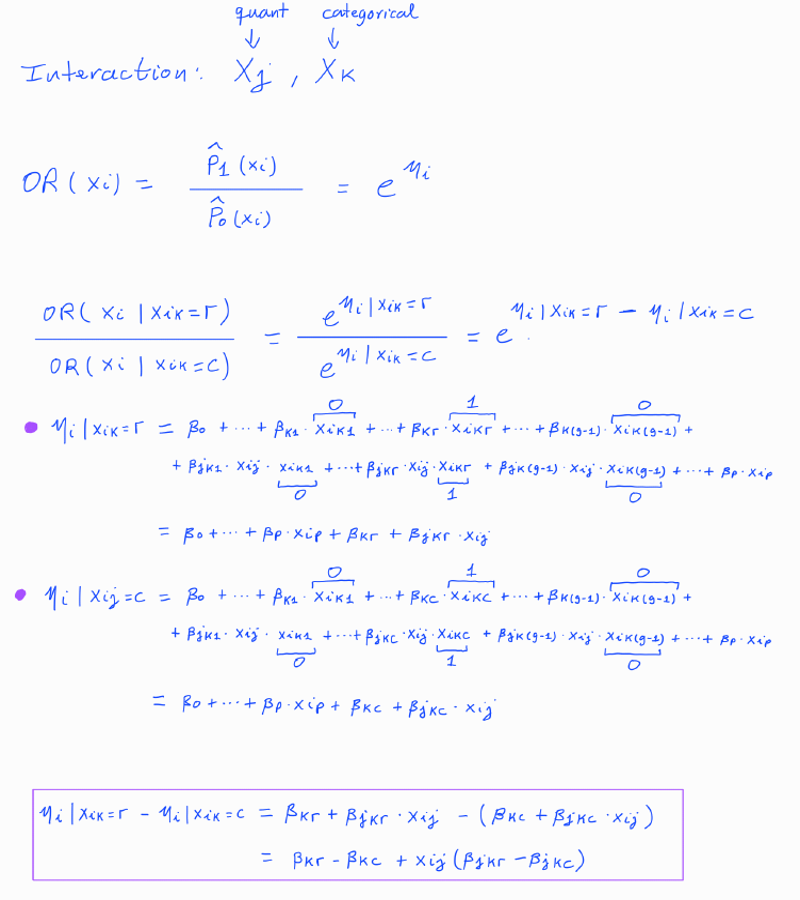

In [8]:
Image.open('images/p6.png').resize((800, 900)).convert("RGB")

We will see an example of coefficient interpretation in Logistic Regression in the practice part.

#### **Hyper-parameters**


- `solver` = the optimization algorithm to be used to solve the optimization problem involved in logistic regression.

- `class_weighted` = if 'balanced' weights are assign to each observation according to the relative frequency of the class they belong to. If None, non weights are considered.

- `penlaty` = to use a regularized version of logistic regression, to control the complexity of the model (to penalize models with many parameters).

- `C` = the regularization parameter.

It is highly recommended to have a look at the `sklearn`implementation of this model, to see in detail how these (an other) parameters work:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

---
---

### **Decision Trees**

We have a response variable $\mathcal{Y}$ and $p$ predictors $\mathcal{X} = (\mathcal{X}_1,\dots, \mathcal{X}_p).$ 

We also have an $n$ size sample of this variables: $\hspace{0.1cm} Y\in \mathbb{R}^n, \hspace{0.2cm} X=(X_1,\dots , X_p)\in \mathbb{R}^{n\times p}$

A graphical example of a regression tree is the following:

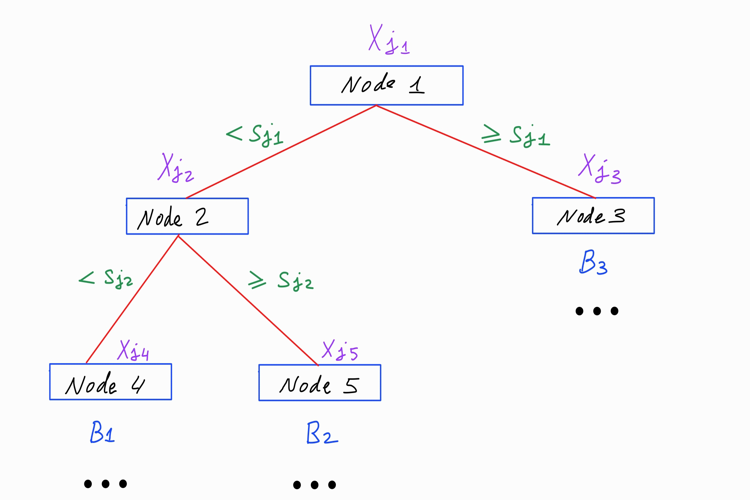

In [10]:
Image.open('images/tree.jpg').resize((750, 500))

Where:

- $B_j$ denotes the branches of the tree, and are the key elements of decision trees, which depends on the predictors $X_j$ and the thresholds $s_j$.

   - For example, in the above tree:

   $$B_1 = \lbrace x\in\mathbb{R}^p \hspace{0.1cm}: \hspace{0.1cm} x_{j_1} < s_{j_1} \hspace{0.07cm};\hspace{0.07cm} x_{j_2} < s_{j_2}   \rbrace  \\[0.6cm]$$

   $$B_2 = \lbrace x\in\mathbb{R}^p \hspace{0.1cm}: \hspace{0.1cm} x_{j_1} < s_{j_1} \hspace{0.07cm};\hspace{0.07cm} x_{j_2} \geq s_{j_2}   \rbrace \\[0.6cm]$$

   $$B_3 = \lbrace x\in\mathbb{R}^p \hspace{0.1cm}: \hspace{0.1cm} x_{j_1} \geq s_{j_1}  \rbrace  \\[0.6cm]$$

   $$\small{j_1, j_2 =1,\dots , p}$$

#### **Predictions**

Once we have estimated the model parameters we can make predictions on the response using data of the predictors.

The prediction of the response for a given value $x_* \in \mathbb{R}^p$  of the predictors is:

- If $x_*\in B_j$, then:

    - In regression problems:

    $$\widehat{\hspace{0.01cm} y \hspace{0.01cm}}_* \hspace{0.05cm}=\hspace{0.05cm}  \overline{Y}_{B_j} \hspace{0.05cm}=\hspace{0.05cm}  \small{\frac{1}{\# B_j}} \sum_{\substack{i=1 \\ x_i \in B_j}}^n y_i$$


    - In classification problems:

    $$\widehat{\hspace{0.01cm} y \hspace{0.01cm}}_* \hspace{0.05cm}=\hspace{0.05cm}  \mathcal{Mo}(Y_{B_j})$$


Where $Y_{B_j}$ are the values of the response for the training predictors observations that fall in the $B_j$ brach.

Note that $x_*$ may be any vector of $\mathbb{R}^p$.

#### **Branches definition**

- **In regression**:

    $$B_1, \dots, B_m \hspace{0.08cm}=\hspace{0.08cm} \text{arg}  \hspace{0.1cm}\underset{ B_1, .., B_m}{\text{Min}} \hspace{0.08cm} \sum_{j=1}^m RSS(B_j)$$

    Where: 

    $$RSS(B_j) = \sum_{\substack{i=1 \\ x_i \in B_j}}^n (y_i - \overline{Y}_{B_j})^2$$

    is the train error in the branch $B_j$.



- **In classification**: 

    $$B_1, \dots, B_m \hspace{0.08cm}=\hspace{0.08cm} \text{arg}  \hspace{0.1cm}\underset{ B_1, .., B_m}{\text{Min}} \hspace{0.08cm} \sum_{j=1}^m \phi(B_j)$$
    
  Where $\phi$ usually is the accuracy, Gini or Entropy:

  - Train Classification Error (1 - Train Accuracy):

    $$\phi(B_j) = 1 - f_{B_j}(y =  \mathcal{Mo}(Y_{B_j})) = 1 - \text{frequency of the most frequent category in the brach } B_j$$   

  - Gini:

    $$\phi(B_j) = \sum_{c \in \mathcal{D}(Y)} f_{B_j}(y=c) \cdot (1 - f_{B_j}(y=c))$$

  - Entropy: 

     $$\phi(B_j) = - \sum_{c \in \mathcal{D}(Y)} f_{B_j}(y=c) \cdot log(f_{B_j}(y=c))$$
 



**Why Gini and entropy?**

Both are high when there is an equal distribution of the response categories in the brach, and small when these distribution is very imbalanced.

When there is a balanced distribution of the response categories in a branch, the train accuracy of that brach will be small, since the frequency of the most frequent category in the branch will be close to $1/\#\mathcal{D}(Y)$ (in a binary problem, close to $0.5$, in a ternary to $0.33$ , and so on), so that the train classification error of that brach will be high ($0.5$, $0.66$, etc).

On the other hand, when we have a very imbalance branch the train accuracy of the branch will be high since the most frequent category will be high, specially when there are not many categories. For example, in a binary problem it will be higher than $0.90$ if the branch is really imbalanced.

So, we are interested in scenarios in which the branches has a imbalance distribution of the categories of the response, and this situations are associated to small Gini and entropy. This is the reason why we  this quantities are minimized  in the training process.

So, minimizing the Gini or Entropy is similar to maximizing the accuracy (or minimizing the classification error).

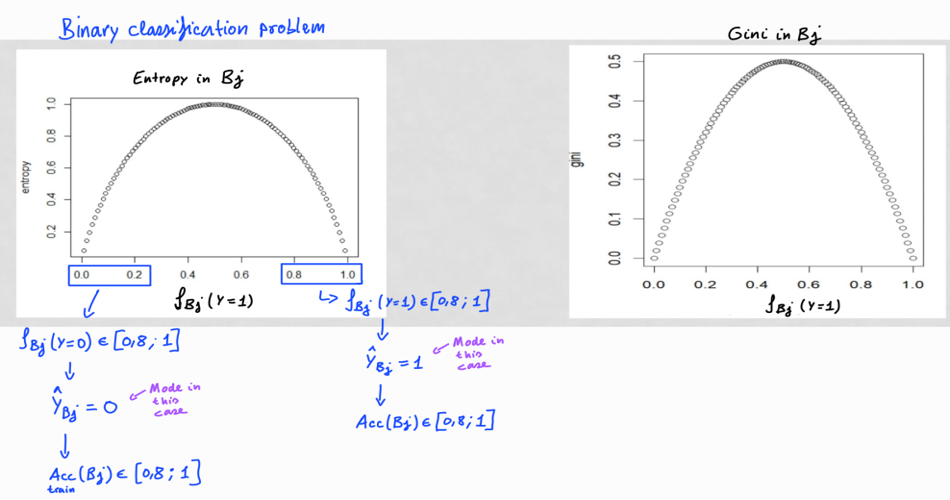

In [11]:
Image.open('images/entropy.png').resize((950, 500)).convert("RGB")


**How to solve this optimization problem?** $\Rightarrow$ ***Recursive binary partition algorithm***

#### **Recursive binary partition algorithm**

The problem is solved sequentially (recursive), starting with the node 1 problem, then the node 2 (given the results of the above node problem (node 1)), and so on. Each node problem only consider two branches (binary), which depends on the results of the above nodes problems.

We are not going to go deeper into the details for the shake of brevity.

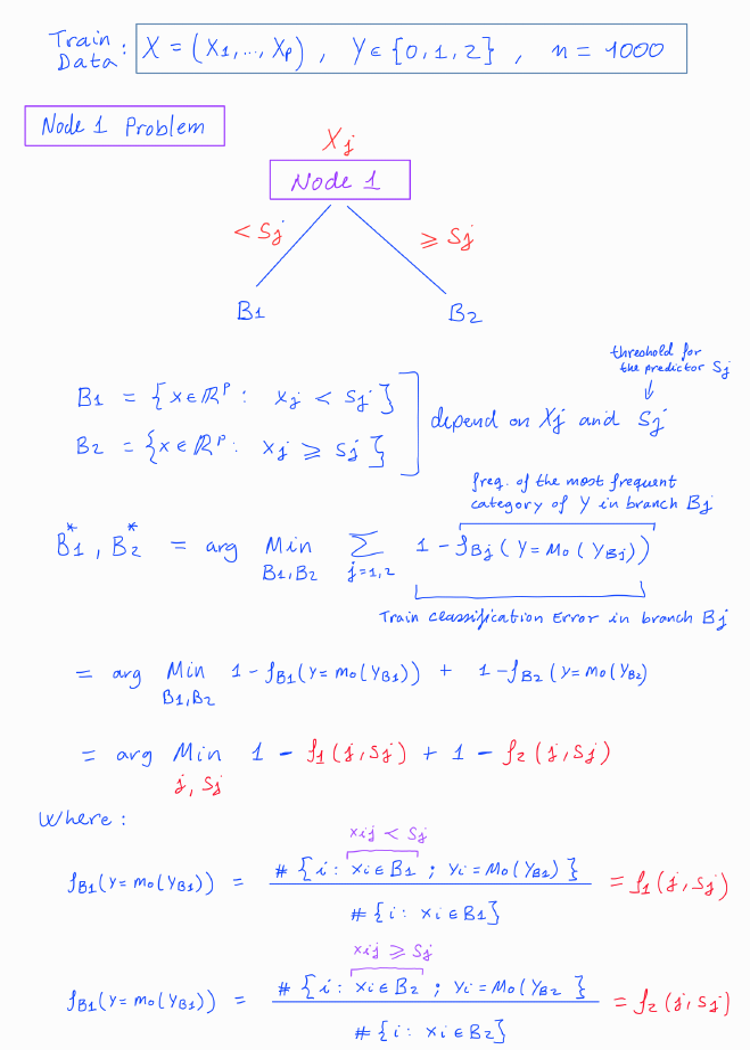

In [14]:
Image.open('images/t1.png').resize((750, 1050)).convert("RGB")

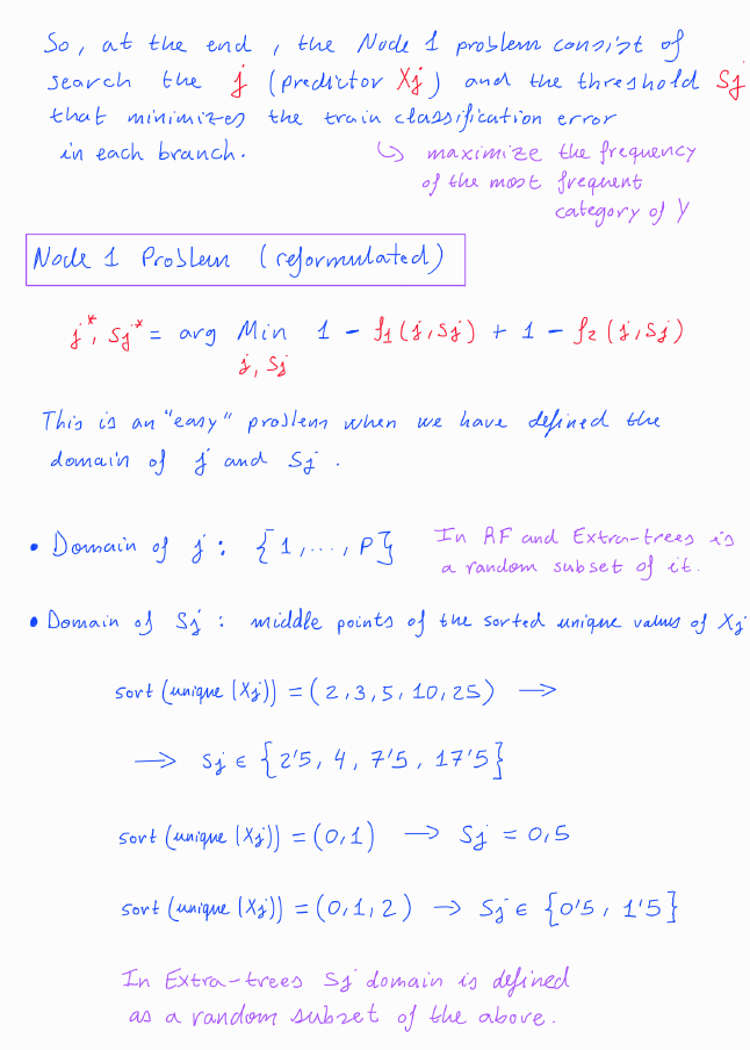

In [15]:
Image.open('images/t2.png').resize((750, 1050)).convert("RGB")

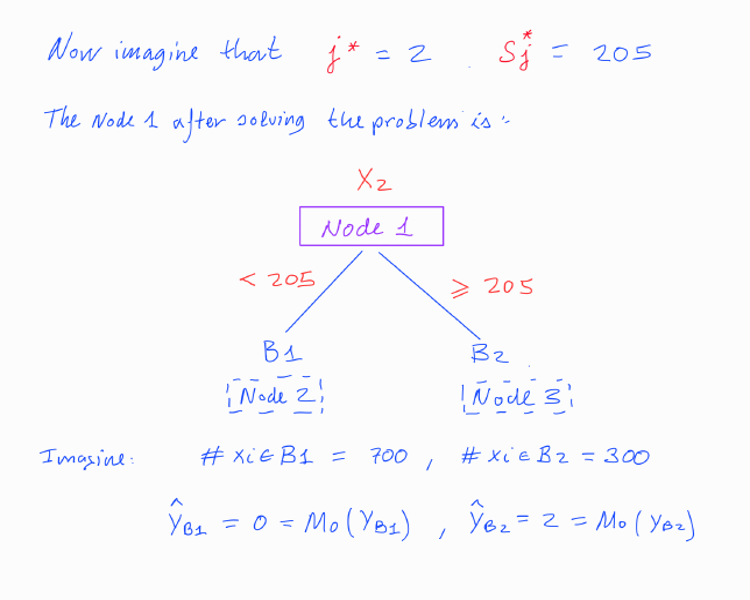

In [23]:
Image.open('images/t3.png').resize((750, 600)).convert("RGB")

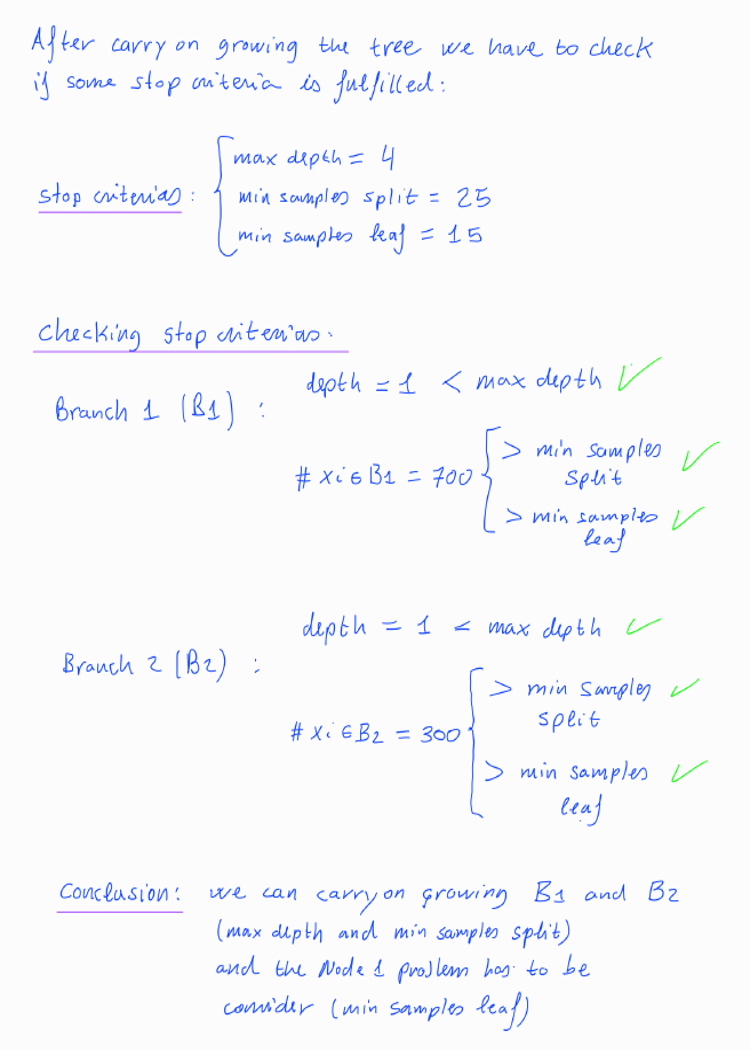

In [24]:
Image.open('images/t4.png').resize((750, 1050)).convert("RGB")

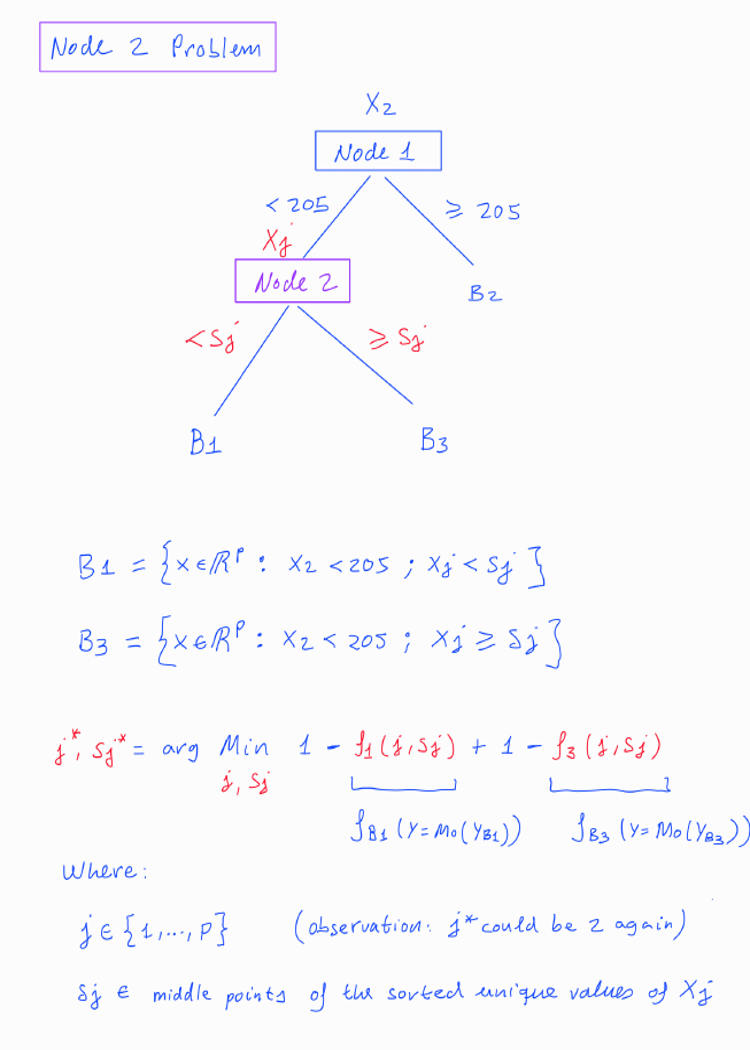

In [25]:
Image.open('images/t5.png').resize((750, 1050)).convert("RGB")

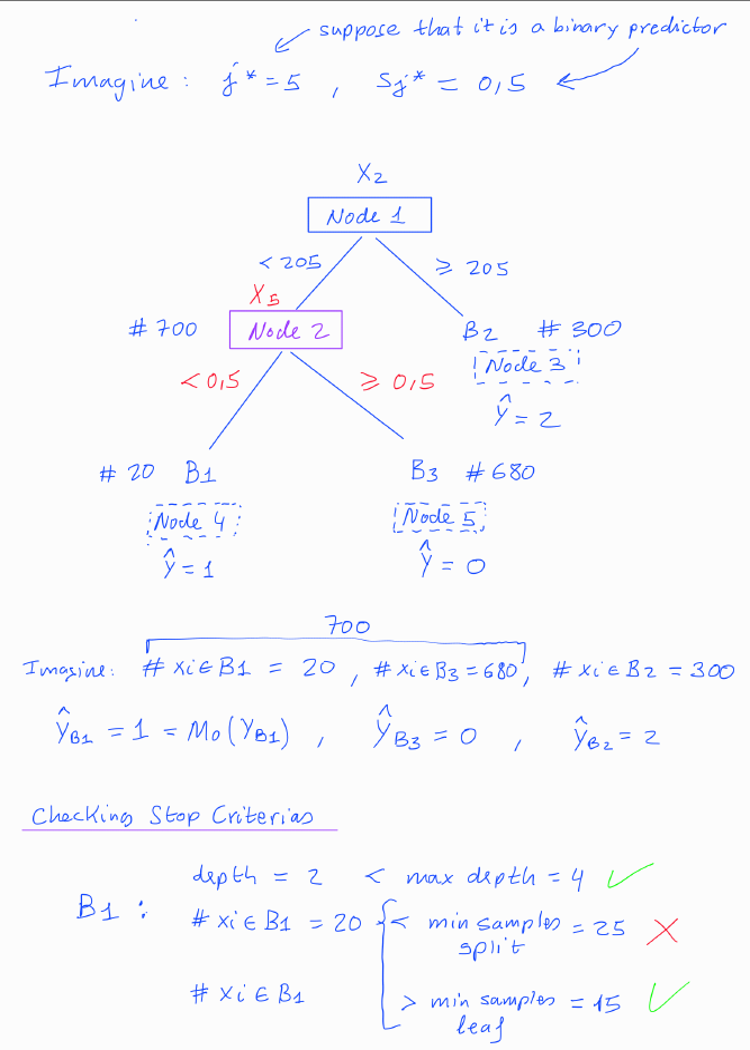

In [26]:
Image.open('images/t6.png').resize((750, 1050)).convert("RGB")

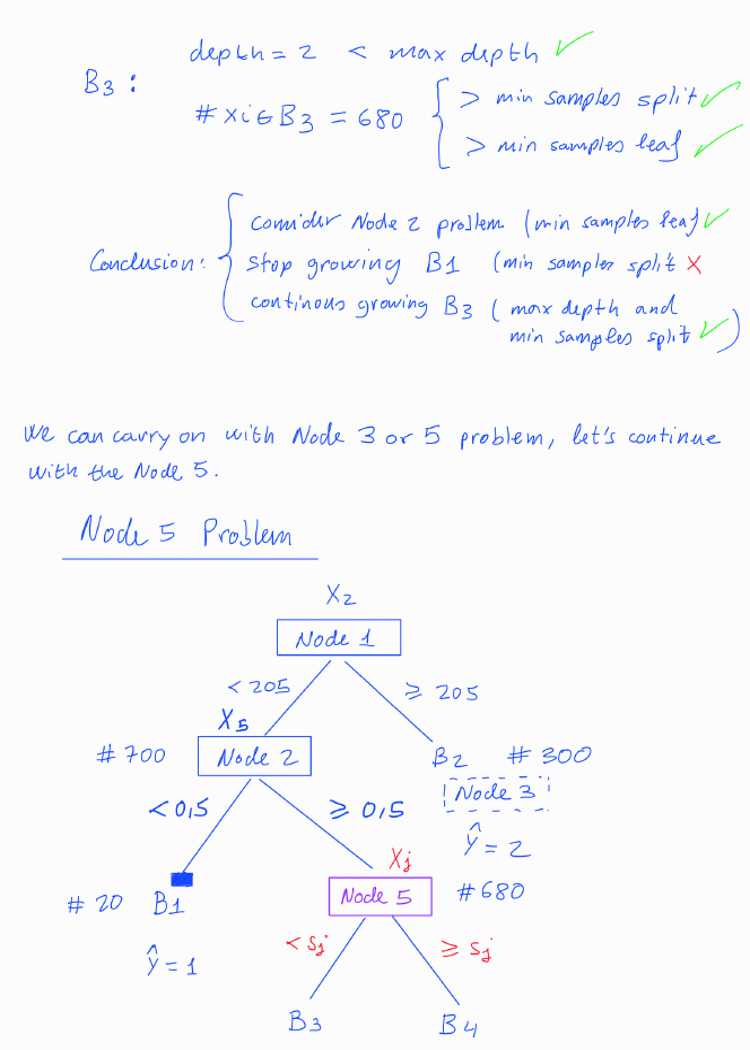

In [27]:
Image.open('images/t7.png').resize((750, 1050)).convert("RGB")

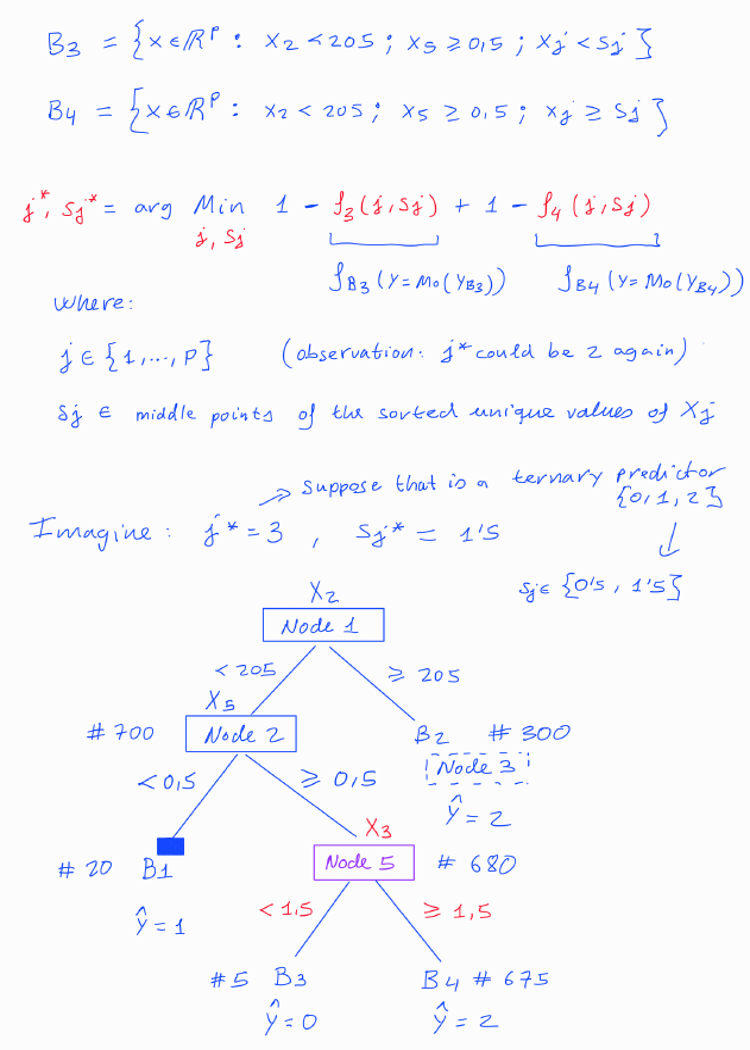

In [28]:
Image.open('images/t8.png').resize((750, 1050)).convert("RGB")

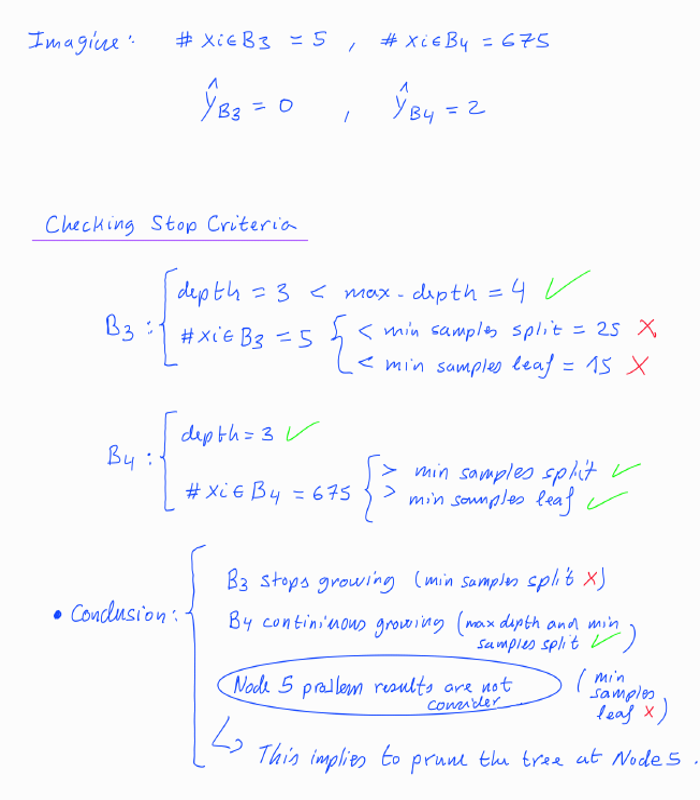

In [32]:
Image.open('images/t9.png').resize((700, 800)).convert("RGB")

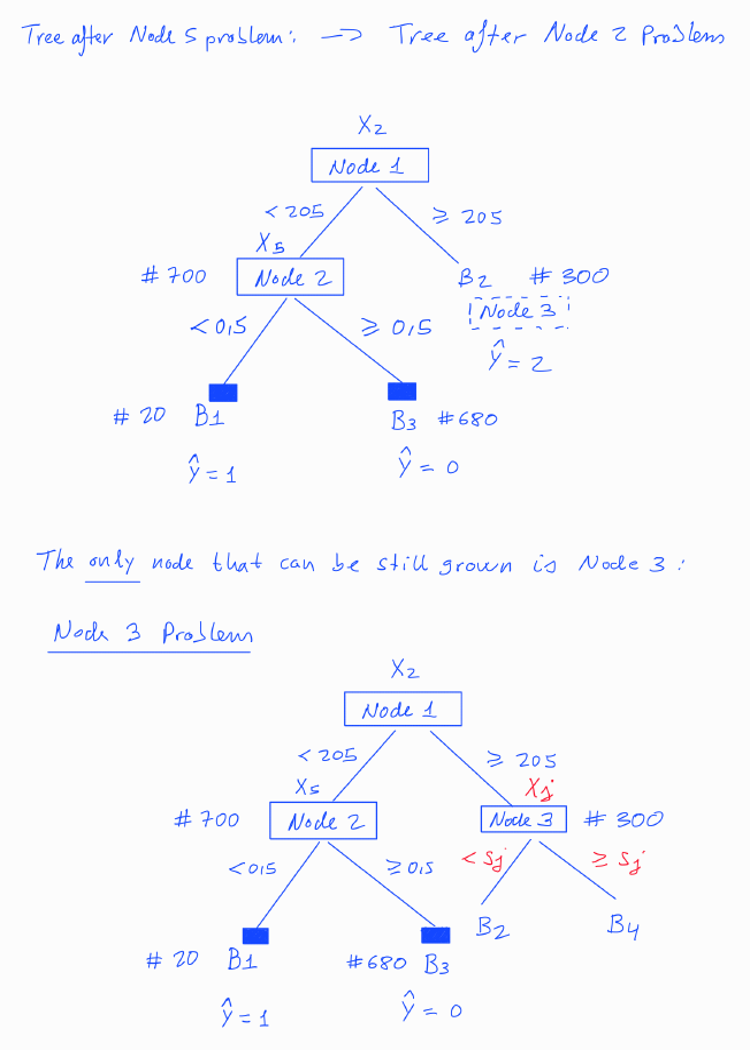

In [33]:
Image.open('images/t10.png').resize((750, 1050)).convert("RGB")

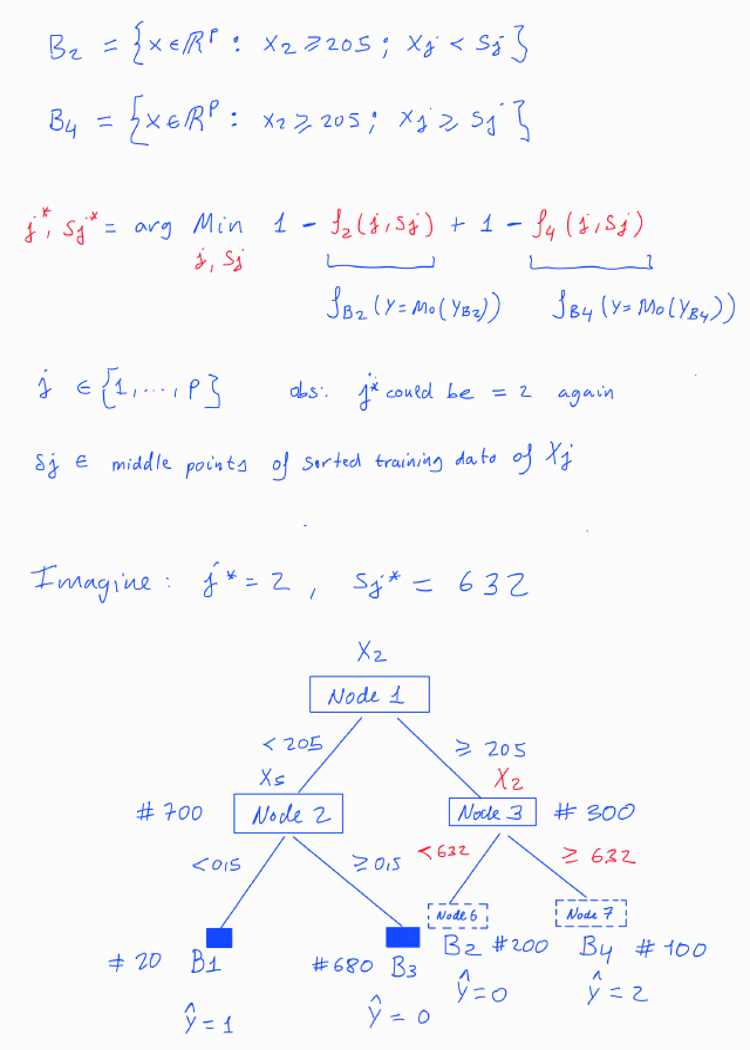

In [34]:
Image.open('images/t11.png').resize((750, 1050)).convert("RGB")

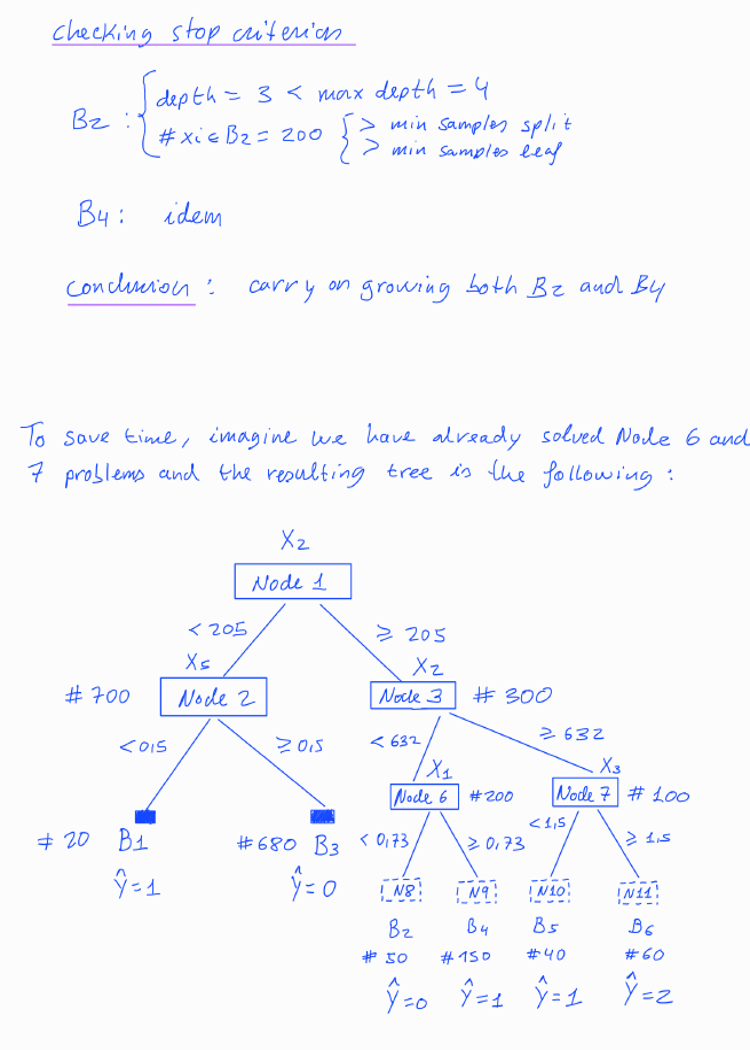

In [35]:
Image.open('images/t12.png').resize((750, 1050)).convert("RGB")

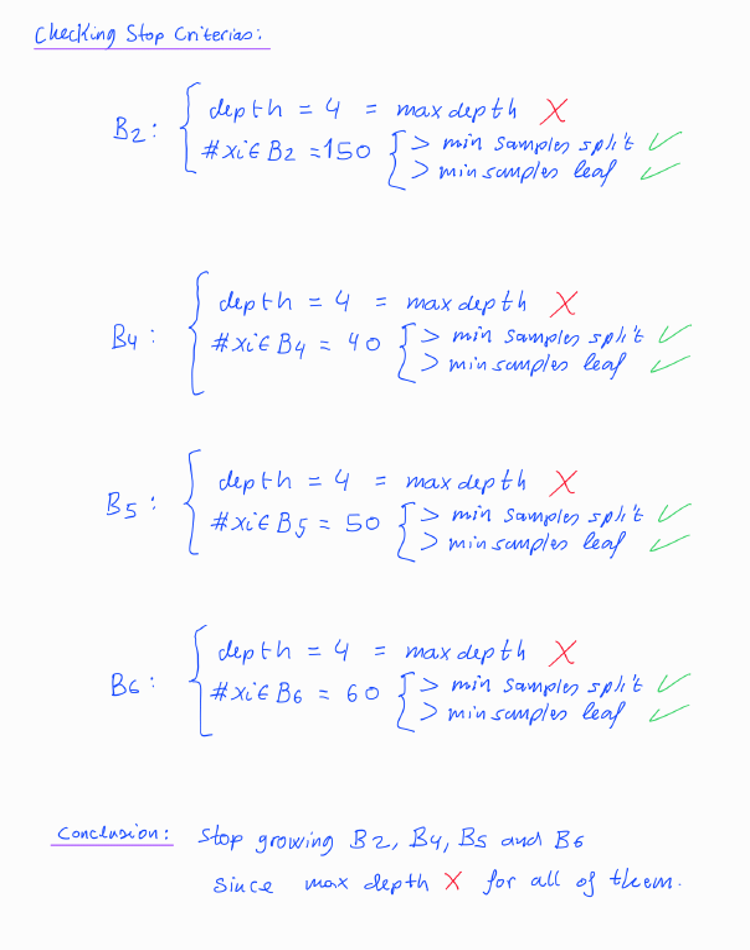

In [37]:
Image.open('images/t13.png').resize((750, 950)).convert("RGB")

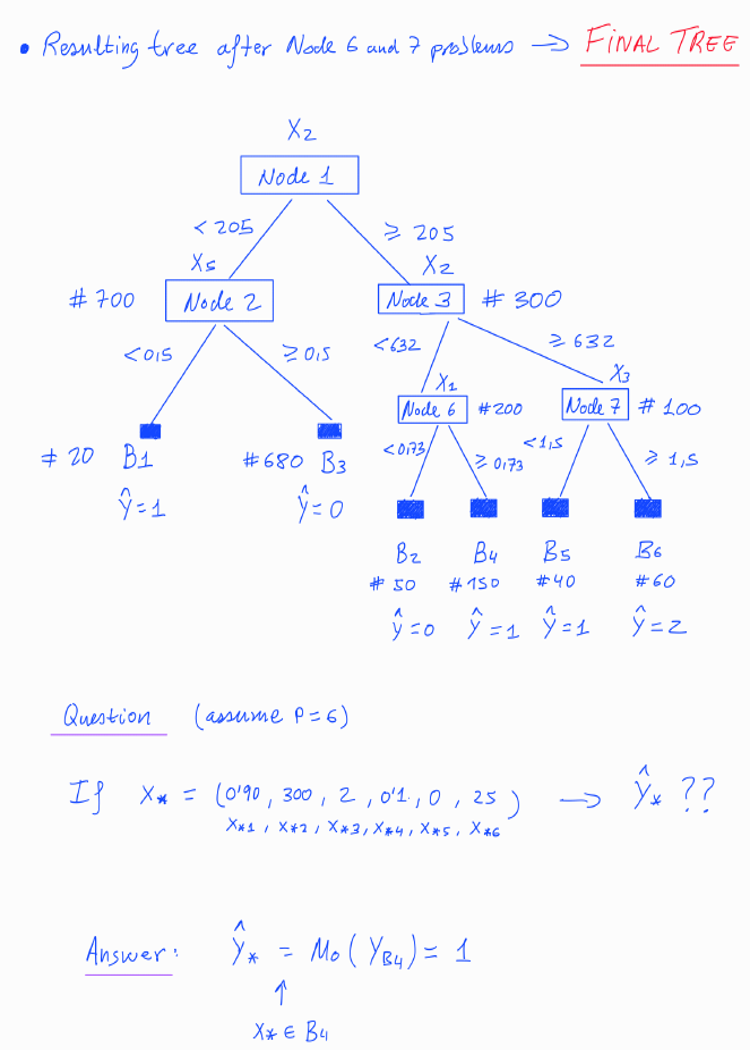

In [38]:
Image.open('images/t14.png').resize((750, 1050)).convert("RGB")

#### **Hyper-parameters**

The most important hyper-parameters (but not the only ones) are the following:

- `max_depth`: the maximum size tolerated for any branch. The size of a branch is its number of nodes.

- `min_samples_split`: number of training observations that has to contain a branch to split its terminal node. If it contains less than this min the terminal node is not split and the branch stop growing.

- `min_samples_leaf`: number of training obs that the new two branches created after splitting a terminal node have to contain to keep/consider that split.

If one of these two new branches contain less than that min, the split is not keep and the initial branch stop growing.

In this last point is important to notice that when a node is split two new branches appear, since branches are defined by a set of conditions and when a node is splitted two new sets of condition appear.

These hyper-parameters control the size of the tree, and serve as stopping criteria for branch growth.

They are applied sequentially.

Focus in a certain branch:

1. If its size is greater than max depth, its terminal node is not splitted.
Else $\Rightarrow$ 2.

2. If the branch contains less training obs than min samples split, its terminal node is not splitted.
Else $\Rightarrow$ 3.

3. If the num of train obs that one (or both) of the two new branches created after splitting its terminal node is lower than min samples leaf, that split is not considered.
Else $\Rightarrow$ split its terminal node.

It is highly recommended to have a look at the `sklearn` implementation of this model, to see in detail how these (an other) parameters work:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

---
---

### **Ensembles**

Model that aggregate other models (base models) to construct another model (meta-model).

#### **Bagging**

We have a response variable $\mathcal{Y}$ and $p$ predictors $\mathcal{X} = (\mathcal{X}_1,\dots, \mathcal{X}_p).$ 

We also have an $n$ size sample of this variables: $\hspace{0.1cm} Y\in \mathbb{R}^n, \hspace{0.2cm} X=(X_1,\dots , X_p)\in \mathbb{R}^{n\times p}$

The bagging algorithm has the following steps:

- $B$ bootstrap samples $(X_1,Y_1),\dots, (X_B,Y_B)$ are extracted from $(X, Y)$, with a certain size $n_b\in \lbrace 1,\dots n\rbrace$ and number of predictors $p_b\in \lbrace 1,\dots p\rbrace$, the same for all of them.

- For $b=1,\dots , B$:

    - The base model $M$ is trained with $(X_b,Y_b)$ $\hspace{0.1cm}\Rightarrow\hspace{0.1cm}$ $\widetilde{M}_b= M(\cdot | X_b,Y_b)$



The prediction of the response for a given value $x_*\in \mathbb{R}^p$ of the predictors  is:

- In regression: 

$$\widehat{y}_* \hspace{0.05cm} = \hspace{0.05cm} \frac{1}{B} \sum_{b=1}^B \widehat{\hspace{0.03cm} y\hspace{0.03cm}}_*^{(b)}$$

- In classification: 

$$\widehat{y}_* \hspace{0.05cm} = \hspace{0.05cm} \mathcal{Mo} \Big(  \big(\widehat{\hspace{0.03cm} y\hspace{0.03cm}}_*^{(b)} \big)_{b=1,\dots B}\Big)$$


Where $\widehat{\hspace{0.03cm} y\hspace{0.03cm}}_*^{(b)}= M(x_* | X_b,Y_b)$, namely, is the prediction made by $\widetilde{M}_b$ for $x_*$.

##### **Hyper-parameters**

- $B =$ `n_estimators`

- $n_b = $ `max_samples`

- $p_b =$ `max_features`

It is highly recommended to have a look at the `sklearn` implementation of this model, to see in detail how these (an other) parameters work:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

---
---

#### **Random Forest**

We have a response variable $\mathcal{Y}$ and $p$ predictors $\mathcal{X} = (\mathcal{X}_1,\dots, \mathcal{X}_p).$ 

We also have an $n$ size sample of this variables: $\hspace{0.1cm} Y\in \mathbb{R}^n, \hspace{0.2cm} X=(X_1,\dots , X_p)\in \mathbb{R}^{n\times p}$

The Random Forest algorithm has the following steps:

- $B$ bootstrap samples $(X_1,Y_1),\dots, (X_B,Y_B)$ are extracted from $(X, Y)$, with a certain size $n_b\in \lbrace 1,\dots n\rbrace$.

- For $b=1,\dots , B$:

    - The **tree** base model $M$ is trained with $(X_b,Y_b)$ $\hspace{0.1cm}\Rightarrow\hspace{0.1cm}$ $\widetilde{M}_b = M(\cdot | X_b,Y_b)$

       - Where tree model $M$ has the following particularity: 
       
         1. In each node problem only consider $p_{\tiny{RF}} \leq p$ predictors selected randomly. 
         
         
        This random selection depend on bootstrap sample, so, it depends on $b$, and, therefore, the model as well.



The prediction of the response for a given value $x_*\in \mathbb{R}^p$ of the predictors  is:

- In regression: 

$$\widehat{y}_* \hspace{0.05cm} = \hspace{0.05cm} \frac{1}{B} \sum_{b=1}^B \widehat{\hspace{0.03cm} y\hspace{0.03cm}}_*^{(b)}$$

- In classification: 

$$\widehat{y}_* \hspace{0.05cm} = \hspace{0.05cm} \mathcal{Mo} \Big(  \big(\widehat{\hspace{0.03cm} y\hspace{0.03cm}}_*^{(b)} \big)_{b=1,\dots B}\Big)$$


Where $\widehat{\hspace{0.03cm} y\hspace{0.03cm}}_*^{(b)}= M(x_* | X_b,Y_b)$, namely, is the prediction made by $\widetilde{M}_b$ for $x_*$.

##### **Hyper-parameters**

- $B =$ `n_estimators`

- $n_b = $ `max_samples`


- $p_{\tiny{RF}} =$ `max_features`

It is highly recommended to have a look at the `sklearn` implementation of this model, to see in detail how these (an other) parameters work:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

---
---

#### **Extra-Trees**




We have a response variable $\mathcal{Y}$ and $p$ predictors $\mathcal{X} = (\mathcal{X}_1,\dots, \mathcal{X}_p).$ 

We also have an $n$ size sample of these variables: $\hspace{0.1cm} Y\in \mathbb{R}^n, \hspace{0.2cm} X=(X_1,\dots , X_p)\in \mathbb{R}^{n\times p}$

The Extra-Trees (Extremely Randomized Trees) algorithm has the following steps:

- The whole data $(X,Y)$ will be used to train each base model (bootstrap sampling is not used).

- For $b=1,\dots , B$: 

    - The **tree** base model $M_b$ is trained with $(X,Y)$ $\hspace{0.1cm}\Rightarrow\hspace{0.1cm}$ $\widetilde{M}_b = M_b(\cdot | X,Y)$

       - Where the tree model $M_b$ has the following particularities: 
       
          1. In each node problem only consider $p_{\tiny{ET}} < p$ predictors selected randomly. 

          2. The threshold associated to each selected predictor is chosen randomly. 
          
          Both random selections depend on bootstrap sample, so, it depends on $b$, and, therefore, the model as well.



The prediction of the response for a given value $x_*\in \mathbb{R}^p$ of the predictors  is:

- In regression: 

$$\widehat{y}_* \hspace{0.05cm} = \hspace{0.05cm} \frac{1}{B} \sum_{b=1}^B \widehat{\hspace{0.03cm} y\hspace{0.03cm}}_*^{(b)}$$

- In classification: 

$$\widehat{y}_* \hspace{0.05cm} = \hspace{0.05cm} \mathcal{Mo} \Big(  \big(\widehat{\hspace{0.03cm} y\hspace{0.03cm}}_*^{(b)} \big)_{b=1,\dots B}\Big)$$


Where $\widehat{\hspace{0.03cm} y\hspace{0.03cm}}_*^{(b)}= M(x_* | X_b,Y_b)$, namely, is the prediction made by $\widetilde{M}_b$ for $x_*$.

##### **Hyper-parameters**

- $B =$ `n_estimators`

- $p_{\tiny{ET}} =$ `max_features`

It is highly recommended to have a look at the `sklearn` implementation of this model, to see in detail how these (an other) parameters work:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

---
---

#### **Boosting**

Here we are going to explained the basics of boosting algorithm for regression problems, since are the easiest ones. This idea could be extrapolated to classification problems using another definition of the residuals.

We have a response variable $\mathcal{Y}$ and $p$ predictors $\mathcal{X} = (\mathcal{X}_1,\dots, \mathcal{X}_p).$ 

We also have an $n$ size sample of these variables: $\hspace{0.1cm} Y\in \mathbb{R}^n, \hspace{0.2cm} X=(X_1,\dots , X_p)\in \mathbb{R}^{n\times p}$



Consider a decision tree model with a fix max depth (hyper-param): $M_T$

The steps of the boosting algorithm are the following:


- $\widehat{Y} = 0$

- $\varepsilon_{(1)} = Y - \widehat{Y} = Y$

- For $b=1,\dots,B$ :

    - $\widehat{Y}^{(b)} =  M_T(X | X, \varepsilon_{(b)})$

   - $\varepsilon_{(b)} =  Y - \widehat{Y}^{(b)}$


The prediction of the response for a given value $x_*\in \mathbb{R}^p$ of the predictors is:

$$\widehat{\hspace{0.03cm} y \hspace{0.03cm}}_* \hspace{0.05cm} = \hspace{0.05cm}  \sum_{b=1}^B \lambda\cdot\widehat{\hspace{0.03cm} y\hspace{0.03cm}}_*^{(b)}$$

Where $\widehat{\hspace{0.03cm} y\hspace{0.03cm}}_*^{(b)} = M_T(x_* | X,\varepsilon_{(b)})$.

##### **Hyper-parameters**

- $\lambda =$ `learning_rate`


It is highly recommended to have a look at the `sklearn` implementation of this model, to see in detail how these (an other) parameters work:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html#sklearn.ensemble.HistGradientBoostingClassifier

##### **XGBoost**

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework.

https://xgboost.readthedocs.io/en/stable/python/index.html

https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning#A-Guide-on-XGBoost-hyperparameters-tuning

---
---

#### **Stacking**

We have a response variable $\mathcal{Y}$ and $p$ predictors $\mathcal{X} = (\mathcal{X}_1,\dots, \mathcal{X}_p).$ 

We also have an $n$ size sample of this variables: $\hspace{0.1cm} Y\in \mathbb{R}^n, \hspace{0.2cm} X=(X_1,\dots , X_p)\in \mathbb{R}^{n\times p}$.

**Cross Validation Predictions**

An important concept in stacking is Cross Validation ($k$-Fold) predictions. First we will explain it.

$(X,Y)$ are divided in $k$ Folds:


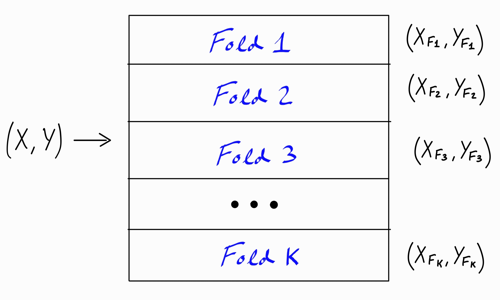

In [12]:
Image.open('images/cv_predictions.jpg').resize((500, 300))



- Cross validation predictions for the $j$-th Fold with model $M$ $\hspace{0.1cm}\Rightarrow \hspace{0.1cm} \widehat{Y}_{F_j} = M( X_{F_j} | X_{F_{\neq j}}, Y_{F_{\neq j}})$

   - $X_{F_{\neq j}} = (X_{F_h} : h\neq j=1,\dots ,k)\quad$ (concatenation by rows)

   - $Y_{F_{\neq j}} = (Y_{F_h} : h\neq j=1,\dots ,k)\quad$ (concatenation by rows)

- Cross validation predictions with model $M$ $\hspace{0.1cm}\Rightarrow \hspace{0.1cm} \widehat{Y}_{CV} = \left(\widehat{Y}_{F_1},\dots ,  \widehat{Y}_{F_k}\right)$

Note that cross validation predictions are testing predictions since the model is trained with different observations to the ones predicted.

**Stacking algorithm**

- Base models: $M_1,\dots, M_h$

- Meta models: $M_*$

- Compute Cross Validation Predictions of the response for each base model, using $(X,Y)$.

   $$\widehat{Y}_{CV}(M_1),\dots ,\widehat{Y}_{CV}(M_h)$$

- Stacking data:

   $$\left(X_{ST}, Y\right) = \big(\hspace{0.05cm}\underset{\text{Stacking predictors}}{\underbrace{\widehat{Y}_{CV}(M_1),\dots ,\widehat{Y}_{CV}(M_h)}}, Y \hspace{0.05cm}\big)$$

- Train meta-model $\mathcal{M}$ with Stacking data $\hspace{0.1cm}\Rightarrow\hspace{0.1cm}$ $\widetilde{\mathcal{M}}_* = \mathcal{M}(\cdot | X_{ST}, Y)$

- Train base-models  $M_1,\dots, M_h$ with original data $\hspace{0.1cm}\Rightarrow\hspace{0.1cm}$ $\widetilde{M}_j = M_j(\cdot | X, Y), \quad j=1,\dots,h$

- The prediction of the response for a given value $x_*\in \mathbb{R}^p$ of the predictors is:

   $$\mathcal{M}(x_*^{\tiny{ST}}| X_{ST}, Y)$$

   where:

    - $x_*^{\tiny{ST}} = (\widehat{y}_{*1}, \dots, \widehat{y}_{*h})\in \mathbb{R}^h$ is the Stacking version of $x_*\in \mathbb{R}^p$.

    - $\widehat{y}_{*j} = M_j(* | X,Y)$ is the prediction made by the $j$-th base model for $x_*$, for $j=1,\dots, h$.




### **Naive Bayes**

You can find theory for this in the text classification notebook.

## **Model Evaluation**

### **Validation** 

The validation algorithms are methods to estimate the predictive error of supervised ML algorithms, mainly for comparing different models and alternatives to select the best one.


All the validation methods that we will see are based on the principle that the model has to be trained with one data and tested with another. The idea is to evaluate the predictive performance of the model on different data that the one that the model has already seen, that is, the one used for training the model.

If the predictive performance of a model would be evaluated using the same data that has been used to train it, the estimation would be optimistically biased, since ML models used to predict better the training data than a new one (the testing), this is call overfitting.

#### **Validation Metrics**

The validation algorithms use validation metrics, that are metrics to measure the quality of the model predictions.


##### **In Regression**

   - MAE: 

     $$\phi(\widehat{Y} , Y) = \dfrac{1}{n} \sum_{i=1}^n |\widehat{y}_i - y_i|$$

   - MSE:

      $$\phi(\widehat{Y} , Y) = \dfrac{1}{n} \sum_{i=1}^n (\widehat{y}_i - y_i)^2$$


##### **In Classification**

**Binary problems:**

- Confusion Matrix

- Accuracy

- Balanced accuracy

- Sensitivity

- Specificity

- Precision

- Negative predictive value

- F1 score

**Multi-class problems**


- Accuracy

- Balanced accuracy

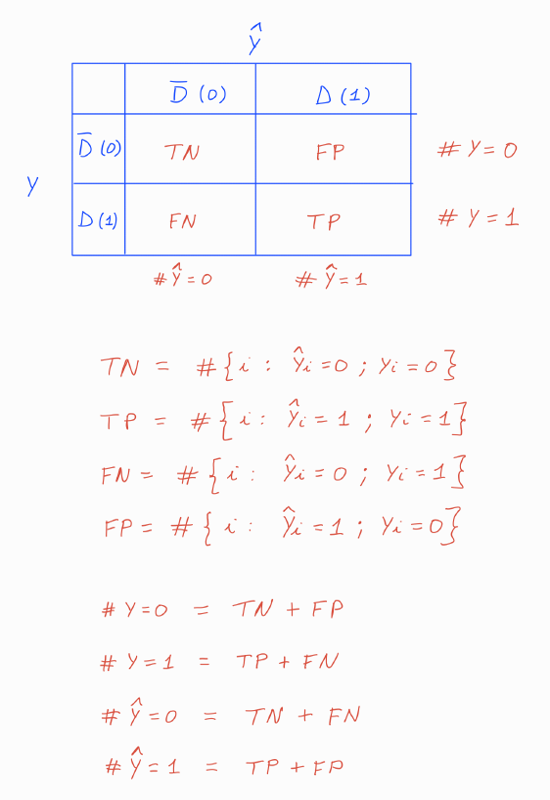

In [13]:
Image.open('images/cm1.png').resize((550, 800)).convert("RGB")

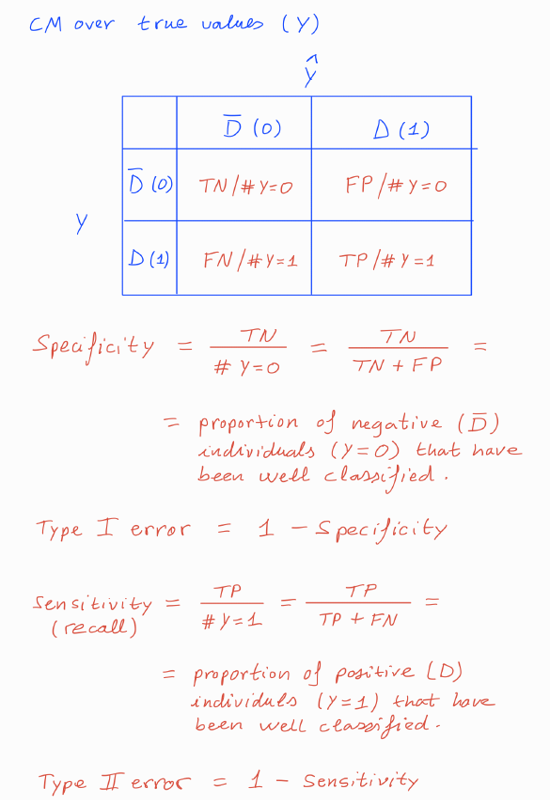

In [14]:
Image.open('images/cm2.png').resize((550, 800)).convert("RGB")

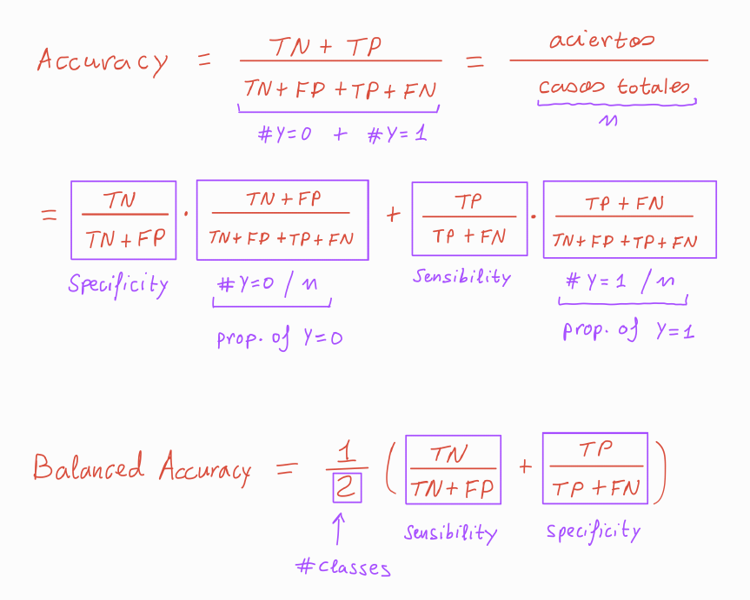

In [15]:
Image.open('images/cm3.png').resize((750, 600)).convert("RGB")

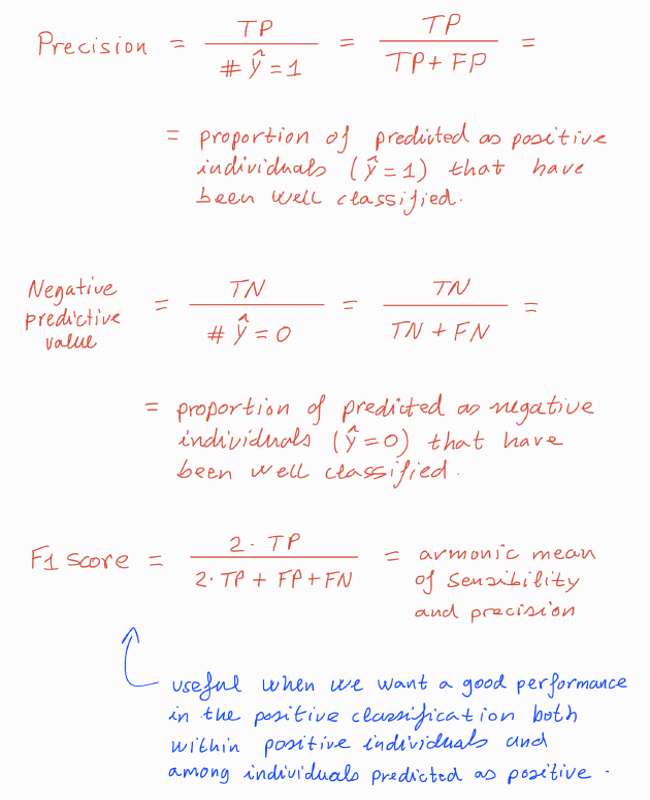

In [16]:
Image.open('images/cm4.png').resize((650, 800)).convert("RGB")

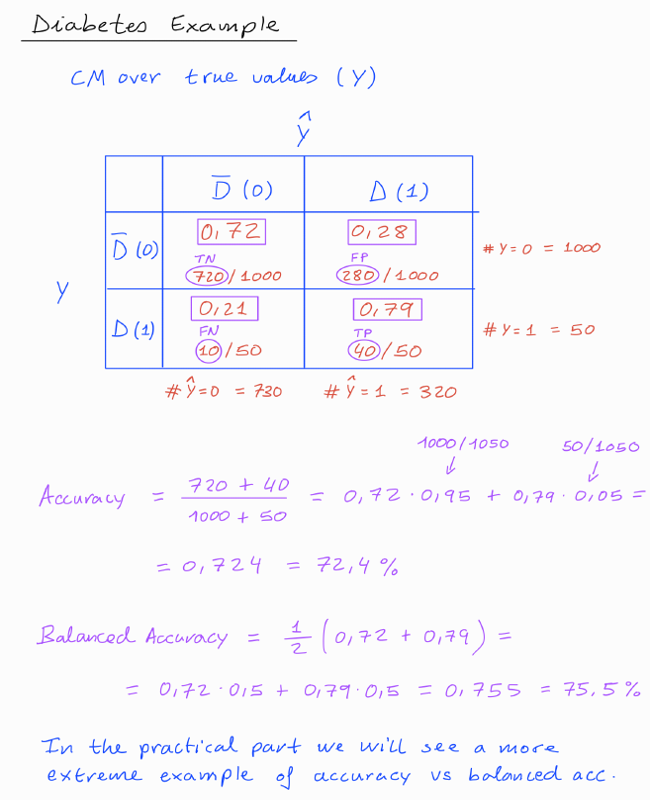

In [17]:
Image.open('images/cm5.png').resize((650, 800)).convert("RGB")

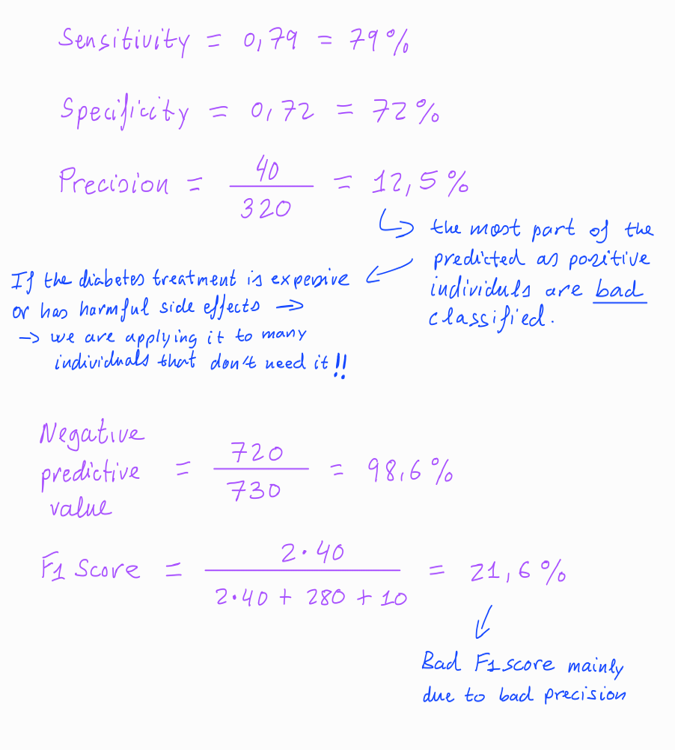

In [18]:
Image.open('images/cm6.png').resize((675, 750)).convert("RGB")

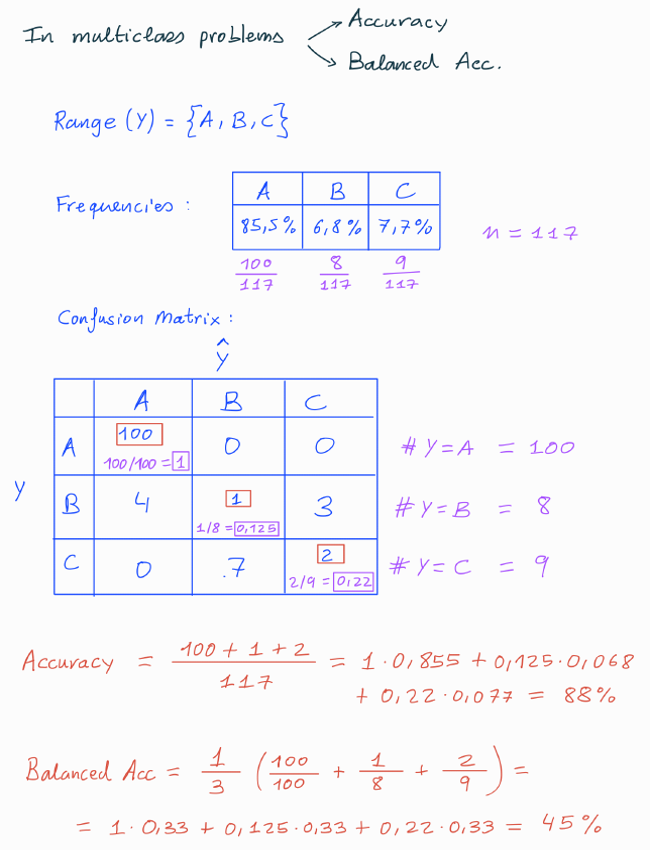

In [19]:
Image.open('images/cm7.png').resize((650, 850)).convert("RGB")


#### **Simple Validation**



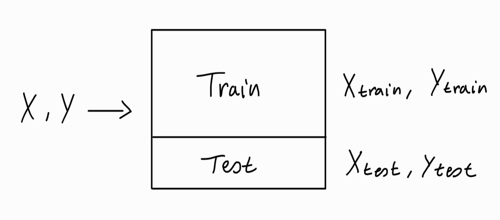

In [20]:
Image.open('images/sv.jpg').resize((500, 220))

- Usual train size: $\hspace{0.1cm}60\%-80\%$

- Usual test size: $\hspace{0.1cm}30\%-20\%$

The steps to compute a validation metric $\phi$ by simple validation are the following:

- $X,Y$ $\Rightarrow$ $\begin{cases}  X_{train} , Y_{train} \\ X_{test}, Y_{test} \end{cases}$

- $\widehat{Y}_{test} = M(X_{test} | X_{train}, Y_{train})$

- Compute the test validation metric: 

   $$\phi_{sv} = \phi(\widehat{Y}_{test}, Y_{test})$$




#### **k-Fold Cross Validation**



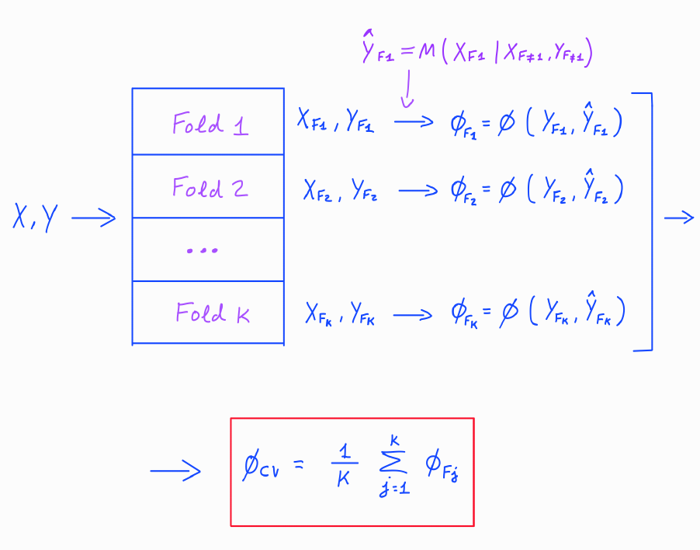

In [14]:
Image.open('images/CV.png').resize((700, 550)).convert("RGB")

The steps to compute a validation metric $\phi$ by simple validation are the following:

- $X,Y$ $\Rightarrow$ $\begin{cases}  X_{F_1} , Y_{F_1} \\ \dots \\ X_{F_k}, Y_{F_k} \end{cases}$

- For $j=1,\dots ,k$ :
   
    - $\widehat{Y}_{F_j} = M(X_{F_j} | X_{F_{\neq j}}, Y_{F_{\neq j}})$
    
       - Where $X_{F_j}$ is the **testing** set and $X_{F_{\neq j}} = (X_{F_{h}} : h\neq j = 1,\dots, k)$ is the **training** one in the $j$-th iteration.

    - $\phi_{F_j} = \phi(\widehat{Y}_{F_j}, Y_{F_j})$

- Compute the test validation metric: 

   $$\phi_{cv} = \dfrac{1}{k} \sum_{j=1}^{k}\phi_{F_j}$$


### **Evaluation** 

#### **Evaluation types**

- **Inner evaluation:** compare alternatives (pipelines). It is part of the training phase.

     - **HPO**: select the best pipeline (transformers + model hyper-parameters) for each model

     - **Best model**: select the best pipeline overall

- **Outer evaluation:** estimation of future performance


#### **Evaluation schemas**

- **Simple evaluation:** 

     - **Outer**: simple validation

     - **Inner**: simple validation or k-Fold

- **Semi-Nested evaluation:** 

    - **Outer**: k-Fold

    - **Inner**: simple validation

- **Nested evaluation:**

   - **Outer**: k-Fold

   - **Inner**: k-Fold

The classic one is the simple evaluation, but the ideal is the nested, but it is also the most expensive and complex.

#### **Hyper-parameter Optimization (HPO)**


Imagine that we have a model $M$ with several hyper-parameters $h_1,\dots , h_r$, whose ranges are $R(h_1),\dots , R(h_r)$.

The model depend on the values of these hyper-parameters, in the sense that they affect to the training process, and therefore, to the its predictions. So, the model can be considered a function of them $M(h) = M(h_1,\dots, h_r)$.

We define a search space (also known as grid), that is, a set that contains combinations of values for those hyperparameters:

$$S \subset R(h_1)\times \dots \times R(h_r)$$

The basic idea of the HPO is to find the best combination in $S$, namely, the one that leads to a lower predictive error, that is, to the best validation metric value.

There are several HPO algorithms that look for that goal, the most basic and popular ones are **grid search** and **random search**.

The basic schema of those algorithms is the following:



1. For $s \in S$

    Apply a validation algorithm like simple validation or KFold CV on $M(s)$ $\Rightarrow$ A validation metric $\phi(s)$ is obtained 

2. The optimal combination of hyper-parameters $s^*$ is the one that leads to less predictive error, this means, to the less $\phi(\cdot)$ if it is an error metric or to the highest if it is an positive metric.

$$s^* \hspace{0.1cm}= \hspace{0.1cm}arg \hspace{0.15cm} \underset{s\in S}{Min/Max}\hspace{0.15cm} \phi(s) \\$$

Random search is the same as grid search but considering a random sample of $S$.

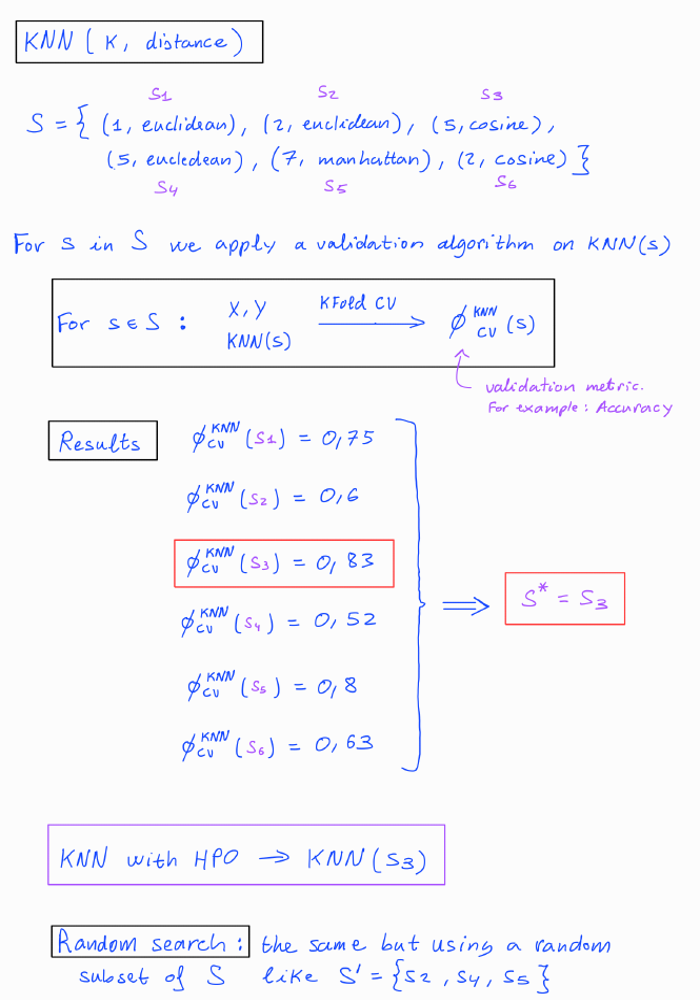

In [22]:
Image.open('images/hpo.png').resize((700, 1000)).convert("RGB")

Some extra comments about HPO:



- HPO can be apply not also to ML models, but also to ML pipelines (transformers + estimators = preprocessing + models)

- HPO is not strictly necessary but is a must to find the best alternative, or one closer to that.

- HPO is part of the inner evaluation, consist in select the best hyper-parameters for a given model, and if we are working with a pipeline, the best transformers (and parameters of the transformers) as well. The first is the classic HPO (model HPO), the second is de advanced (pipeline/global HPO).

- The way to select the best parameters is computing the validation error or the pipeline/model for each alternative/combination (using a validation method of the above, simple or cross validation). Then, the parameters with least predictive error are the selected as the best.

- Types of HPO: grid search, random search, halving search and bayesian search.

- In the practice part we will be focus on `Optuna`, a framework to perform HPO, that is faster and allow to defined dynamic grids (we will se this with more details in the practical part).



## **ML Workflow**

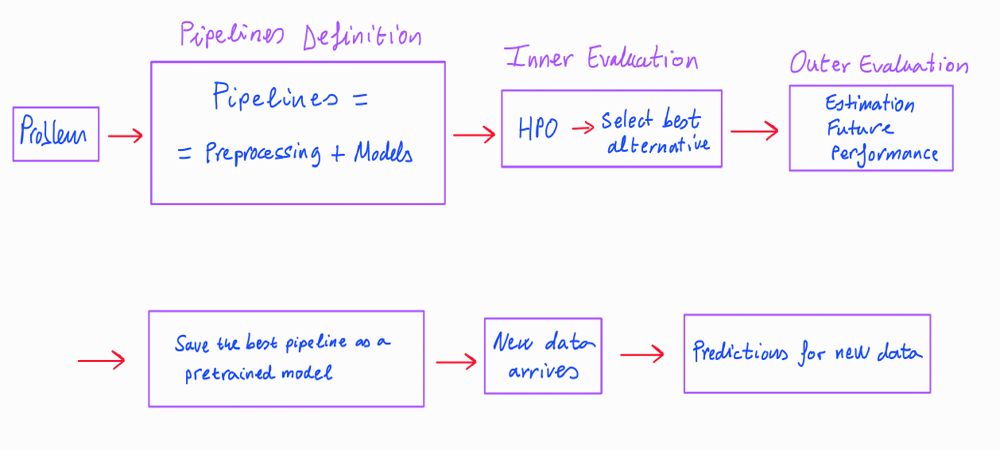

In [23]:
Image.open('images/ml.png').resize((1000, 450)).convert("RGB")